In [1]:
from SeversonDataset_preprocess import dataset_preprocessing_Predictor3
from SeversonDataset_preprocess import train_val_split_by_batch
from FullModel_dimreduct_train import *
from Full_model import DimReduction_1, DimReduction_2, DimReduction_3, DimReduction_4, Predictor_3
from torch.utils.data import DataLoader
from Pytorch_dataset import DimReduction_dataset, Predictor3_dataset
import torch
from Predictor3_train import train_model as predictor3_train
from Predictor3_train import train_model_RLROP as predictor3_train_RLROP
from Predictor3_train import model_evaluate as predictor3_eval
import numpy as np
import matplotlib.pyplot as plt

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# 分過一次就不要再分了
seed = 102
set_code = 'state102'
train_val_split_by_batch(train_ratio=0.8, seed=seed, set_code=set_code)

Number of cells in b1: 33
Number of cells in b2: 39
Number of cells in b3: 43
Discharge curve feature shape: (9100, 4, 500)
Charge curve feature shape: (9100, 4, 500)
Target shape: (9100, 2)
Summary shape: (91, 6, 100)


DimReduct1 is training
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
cuda is available
Validation loss decreased (inf --> 525468.192708).  Saving model ...
Validation loss decreased (525468.192708 --> 32937.700602).  Saving model ...
Validation loss decreased (32937.700602 --> 31378.188761).  Saving model ...
Validation loss decreased (31378.188761 --> 28369.291585).  Saving model ...
EarlyStopping counter: 1 out of 30
EarlyStopping counter: 2 out of 30
EarlyStopping counter: 3 out of 30
EarlyStopping counter: 4 out of 30
EarlyStopping counter: 5 out of 30
EarlyStopping counter: 6 out of 30
EarlyStopping counter: 7 out of 30
EarlyStopping counter: 8 out of 30
EarlyStopping counter: 9 out of 30
EarlyStopping counter: 10 out of 30
EarlyStopping counter: 11 out of 30
EarlyStopping counter: 12 out of 30
EarlyStopping counter: 13 out of 30
EarlyStopping counter: 14 o

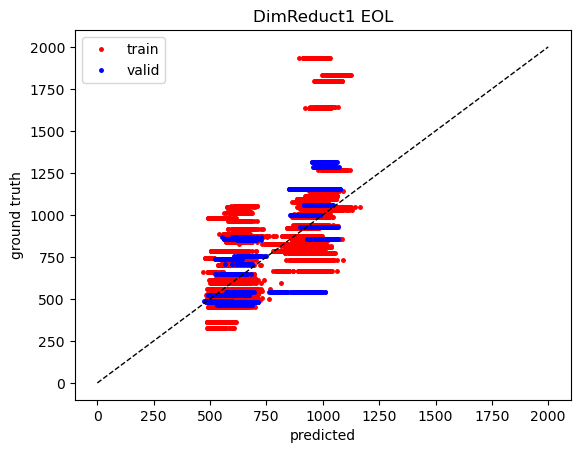

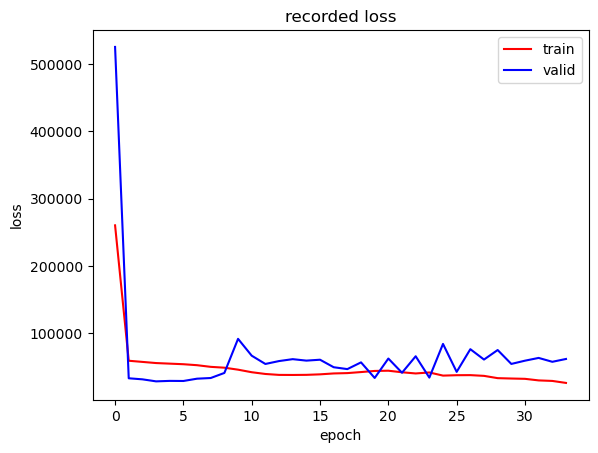

In [4]:
import gc

gc.collect()
torch.cuda.empty_cache()
################### Check file path #####################
seed = 102
set_code = 'state102'
model_num = 'trial3'
#########################################################

##########DimReduct1###########
print('DimReduct1 is training')
# load dataset
batch_size=50

eol_train_dataset = DimReduction_dataset(train=True, pred_target='EOL', norm=True,
                                         segment='discharge', cycle_used=100, set_code=set_code)
eol_test_dataset = DimReduction_dataset(train=False, pred_target='EOL', norm=True,
                                        segment='discharge', cycle_used=100, set_code=set_code)

eol_train_loader = DataLoader(eol_train_dataset, batch_size=batch_size, shuffle=True)
eol_test_loader = DataLoader(eol_test_dataset, batch_size=batch_size, shuffle=True)

# load model
dimreduct1 = DimReduction_1(in_ch=4, out_ch=1, drop=0.1).cuda()

dimreduct1_model, eol_train_loss, eol_valid_loss = dimreduct_eol_train(dimreduct1, eol_train_loader, eol_test_loader,
                                                                       patience=30,
                                                                       lr=8e-3,
                                                                       cosine_period=13,
                                                                       min_lr=1e-06,
                                                                       weight_decay=1e-7,
                                                                       trained_model='dimreduct1',
                                                                       saved_folder=set_code+model_num)

dimreduct1_file = 'Full_model/dimreduct1_'+set_code+model_num+'.pth'
torch.save(dimreduct1_model, dimreduct1_file)
print('Dimreduct1 saved path: '+dimreduct1_file)
print('DimReduct1 training is done.')

dimreduct_eol_eval(dimreduct1, segment='discharge', set_code=set_code)

loss_plot(eol_train_loss, eol_valid_loss)
##########DimReduct1###########

cuda is available
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
Training set|RMSE: 155.27, MAPE: 0.21
Testing set|RMSE: 145.64, MAPE: 0.21


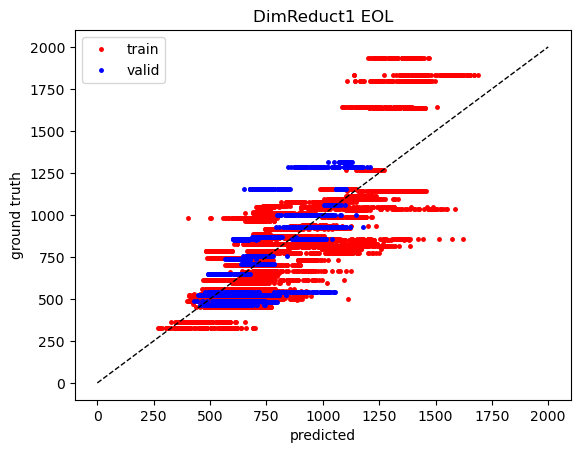

In [6]:
dimreduct_eol_eval(torch.load('Full_model\Saved_dimreduct1\state102trial3\epoch24'), segment='discharge', set_code='state102')

DimReduct2 is training
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
cuda is available
Validation loss decreased (inf --> 5.936777).  Saving model ...
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 6 out of 20
EarlyStopping counter: 7 out of 20
EarlyStopping counter: 8 out of 20
EarlyStopping counter: 9 out of 20
EarlyStopping counter: 10 out of 20
EarlyStopping counter: 11 out of 20
EarlyStopping counter: 12 out of 20
EarlyStopping counter: 13 out of 20
EarlyStopping counter: 14 out of 20
EarlyStopping counter: 15 out of 20
EarlyStopping counter: 16 out of 20
EarlyStopping counter: 17 out of 20
EarlyStopping counter: 18 out of 20
EarlyStopping counter: 19 out of 20
Validation loss decreased (5.936777 --> 4.597362

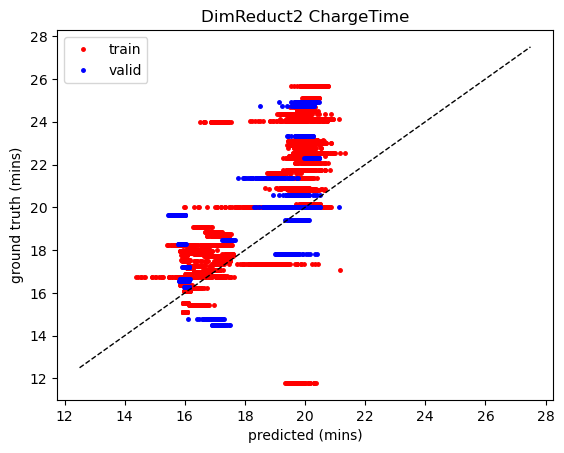

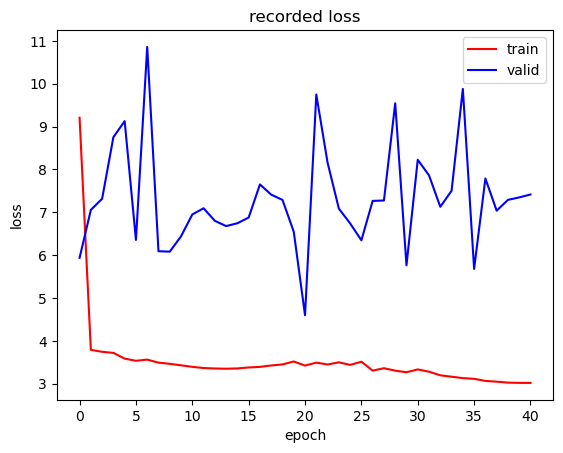

In [19]:
import gc

gc.collect()
torch.cuda.empty_cache()
################### Check file path #####################
seed = 102
set_code = 'state102'
model_num = 'trial2'
#########################################################

##########DimReduct2###########
print('DimReduct2 is training')
# load dataset
batch_size=100

ct_train_dataset = DimReduction_dataset(train=True, pred_target='chargetime', norm=True, segment='discharge', cycle_used=100, set_code=set_code)
ct_test_dataset = DimReduction_dataset(train=False, pred_target='chargetime', norm=True, segment='discharge', cycle_used=100, set_code=set_code)

ct_train_loader = DataLoader(ct_train_dataset, batch_size=batch_size, shuffle=True)
ct_test_loader = DataLoader(ct_test_dataset, batch_size=batch_size, shuffle=True)

# load model
dimreduct2 = DimReduction_2(in_ch=4, out_ch=1, drop=0.1).cuda()

dimreduct2_model, ct_train_loss, ct_valid_loss = dimreduct_ct_train(dimreduct2, ct_train_loader, ct_test_loader, 
                                                                    patience=20,
                                                                    lr=1e-2,
                                                                    cosine_period=13,
                                                                    min_lr=1e-6,
                                                                    weight_decay=0.005,
                                                                    trained_model='dimreduct2',
                                                                    saved_folder=set_code+model_num)

dimreduct2_file = 'Full_model/dimreduct2_'+set_code+model_num+'.pth'
torch.save(dimreduct2_model, dimreduct2_file)
print('Dimreduct2 saved path: '+dimreduct2_file)
print('DimReduct2 training is done.')

dimreduct_ct_eval(dimreduct2_model, segment='discharge', set_code=set_code)

loss_plot(ct_train_loss, ct_valid_loss)
##########DimReduct2###########

cuda is available
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
Training set|RMSE: 4.55, MAPE: 0.23
Testing set|RMSE: 4.31, MAPE: 0.21


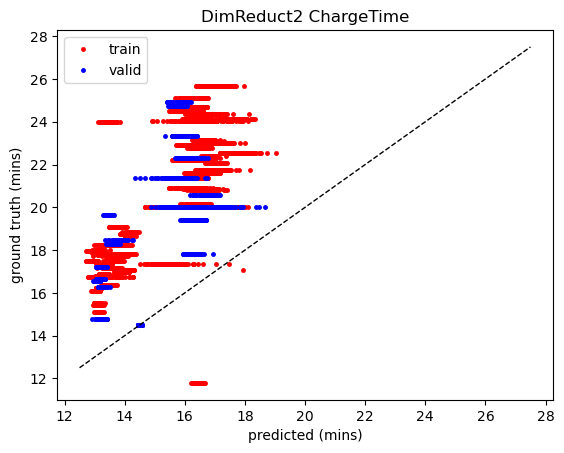

In [14]:
dimreduct_ct_eval(torch.load('Full_model\Saved_dimreduct2\state102trial2\epoch20'), segment='discharge', set_code='state102')

DimReduct3 is training
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
cuda is available
Validation loss decreased (inf --> 105951.699056).  Saving model ...
Validation loss decreased (105951.699056 --> 44833.722510).  Saving model ...
Validation loss decreased (44833.722510 --> 31568.613835).  Saving model ...
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 6 out of 20
EarlyStopping counter: 7 out of 20
EarlyStopping counter: 8 out of 20
EarlyStopping counter: 9 out of 20
Validation loss decreased (31568.613835 --> 28191.376204).  Saving model ...
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
Validation loss decreased (28191.376204 --> 27529.004053).  Saving model ...
EarlyStopping counter: 1

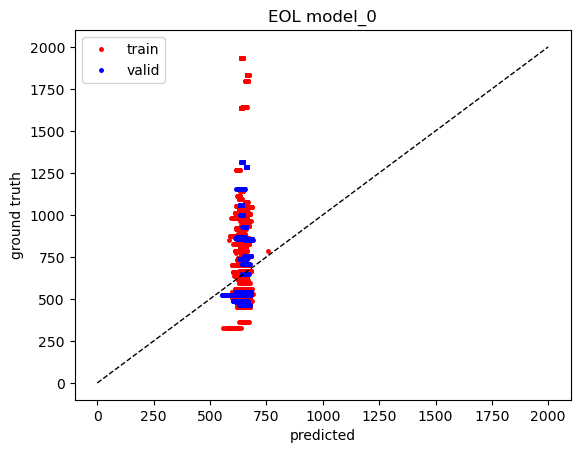

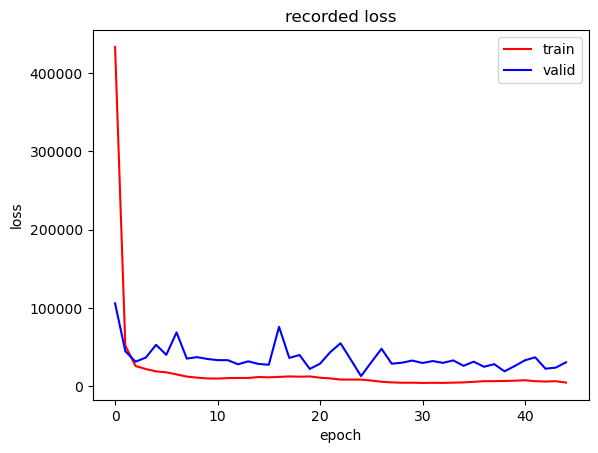

In [25]:
import gc

gc.collect()
torch.cuda.empty_cache()
################### Check file path #####################
seed = 102
set_code = 'state102'
model_num = 'trial1'
#########################################################

##########DimReduct3###########
print('DimReduct3 is training')
# load dataset
batch_size=20

eol_train_dataset = DimReduction_dataset(train=True, pred_target='EOL', norm=True,
                                         segment='charge', cycle_used=100, set_code=set_code)
eol_test_dataset = DimReduction_dataset(train=False, pred_target='EOL', norm=True,
                                        segment='charge', cycle_used=100, set_code=set_code)

eol_train_loader = DataLoader(eol_train_dataset, batch_size=batch_size, shuffle=True)
eol_test_loader = DataLoader(eol_test_dataset, batch_size=batch_size, shuffle=True)

# load model
dimreduct3 = DimReduction_3(in_ch=4, out_ch=1).cuda()

dimreduct3_model, eol_train_loss, eol_valid_loss = dimreduct_eol_train(dimreduct3, eol_train_loader, eol_test_loader,
                                                                       patience=20,
                                                                       lr=1e-3,
                                                                       cosine_period=10,
                                                                       min_lr=1e-06,
                                                                       weight_decay=5e-4,
                                                                       trained_model='dimreduct3',
                                                                       saved_folder=set_code+model_num)

dimreduct3_file = 'Full_model/dimreduct3_'+set_code+model_num+'.pth'
torch.save(dimreduct3_model, dimreduct3_file)
print('Dimreduct3 saved path: '+dimreduct3_file)
print('DimReduct3 training is done.')

dimreduct_eol_eval(dimreduct3_model, segment='charge', set_code=set_code)

loss_plot(eol_train_loss, eol_valid_loss)
##########DimReduct3###########

cuda is available
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
Training set|RMSE: 70.77, MAPE: 0.10
Testing set|RMSE: 96.26, MAPE: 0.13


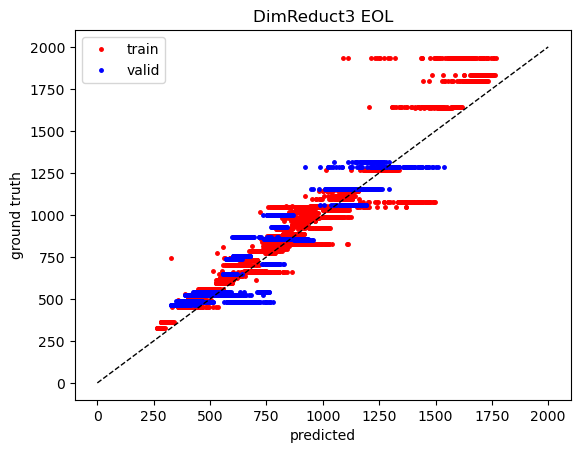

In [3]:
dimreduct_eol_eval(torch.load('Full_model/dimreduct3_state102trial1.pth'), segment='charge', set_code='state102')

DimReduct4 is training
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
cuda is available
Validation loss decreased (inf --> 12.783186).  Saving model ...
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
Validation loss decreased (12.783186 --> 10.183241).  Saving model ...
Validation loss decreased (10.183241 --> 9.980292).  Saving model ...
Validation loss decreased (9.980292 --> 7.079953).  Saving model ...
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 6 out of 20
EarlyStopping counter: 7 out of 20
EarlyStopping counter: 8 out of 20
EarlyStopping counter: 9 out of 20
EarlyStopping counter: 10 out of 20
EarlyStopping counter: 11 out of 20
EarlyStopping counter: 12 out of 20
EarlyStopping count

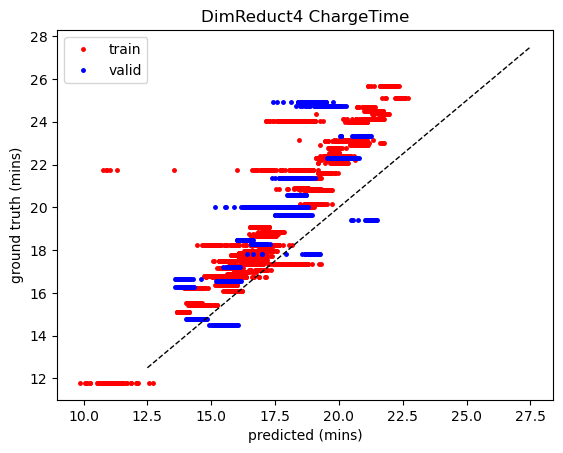

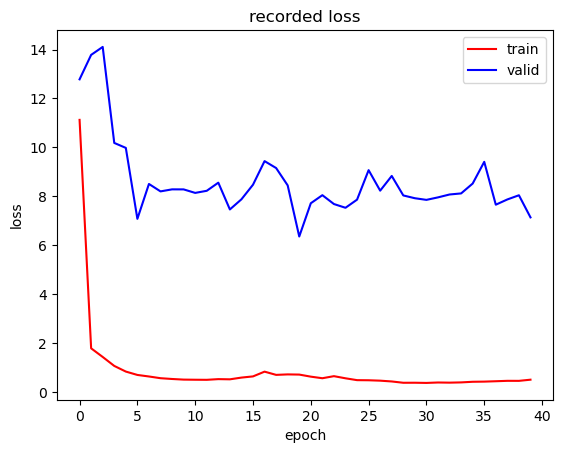

In [6]:
import gc

gc.collect()
torch.cuda.empty_cache()
################### Check file path #####################
seed = 102
set_code = 'state102'
model_num = 'trial3'
#########################################################

##########DimReduct4###########
print('DimReduct4 is training')
# load dataset
batch_size=50

eol_train_dataset = DimReduction_dataset(train=True, pred_target='chargetime', norm=True,
                                         segment='charge', cycle_used=100, set_code=set_code)
eol_test_dataset = DimReduction_dataset(train=False, pred_target='chargetime', norm=True,
                                        segment='charge', cycle_used=100, set_code=set_code)

eol_train_loader = DataLoader(eol_train_dataset, batch_size=batch_size, shuffle=True)
eol_test_loader = DataLoader(eol_test_dataset, batch_size=batch_size, shuffle=True)

# load model
dimreduct4 = DimReduction_4(in_ch=4, out_ch=1, drop=0.1).cuda()

dimreduct4_model, ct_train_loss, ct_valid_loss = dimreduct_ct_train(dimreduct4, eol_train_loader, eol_test_loader,
                                                                       patience=20,
                                                                       lr=1e-3,
                                                                       cosine_period=10,
                                                                       min_lr=1e-06,
                                                                       weight_decay=5e-4,
                                                                       trained_model='dimreduct4',
                                                                       saved_folder=set_code+model_num)

dimreduct4_file = 'Full_model/dimreduct4_'+set_code+model_num+'.pth'
torch.save(dimreduct4_model, dimreduct4_file)
print('Dimreduct4 saved path: '+dimreduct4_file)
print('DimReduct4 training is done.')

dimreduct_ct_eval(dimreduct4_model, segment='charge', set_code=set_code)

loss_plot(ct_train_loss, ct_valid_loss)
##########DimReduct4###########

cuda is available
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
Training set|RMSE: 3.55, MAPE: 0.18
Testing set|RMSE: 3.42, MAPE: 0.17


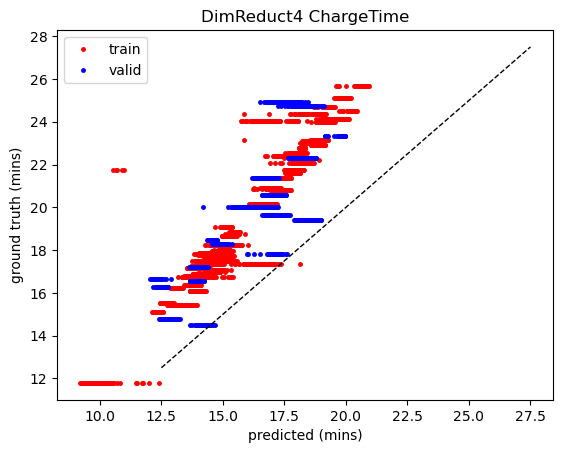

In [2]:
dimreduct_ct_eval(torch.load('Full_model/dimreduct4_state102trial1.pth'), segment='charge', set_code='state102')

First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
(91, 10, 100) (91, 1)
(24, 10, 100) (24, 1)
Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
cuda is available
[Epoch 1/500] train_loss: 166.425, valid_loss: 162.677
....train_rmse: 218.27, valid_rmse: 187.31
Validation loss decreased (inf --> 162.676910).  Saving model ...
[Epoch 2/50

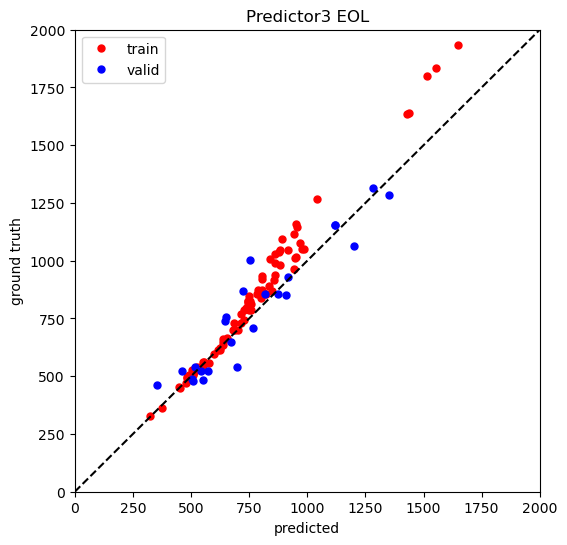

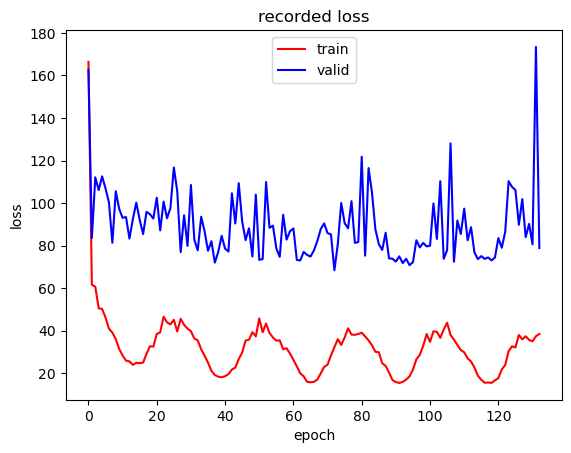

In [20]:
import gc

gc.collect()
torch.cuda.empty_cache()
################### Check file path #####################
set_code = 'state102'
model_num = 'md6'
file_tag = 'dim1trial3e24_dim2trial2'
dimreduct1_path = 'Full_model\Saved_dimreduct1\state102trial3\epoch24'
dimreduct2_path = 'Full_model/dimreduct2_state102trial2.pth'
dimreduct3_path = 'Full_model/dimreduct3_state102trial1.pth'
dimreduct4_path = 'Full_model/dimreduct4_state102trial1.pth'
########################################################

##########Predictor3###########
dataset_preprocessing_Predictor3(cycle_used=100,
                                    dimreduct1_path=dimreduct1_path,
                                    dimreduct2_path=dimreduct2_path,
                                    dimreduct3_path=dimreduct3_path,
                                    dimreduct4_path=dimreduct4_path,
                                    set_code=set_code,
                                    file_tag=file_tag)
# load dataset
train_dataset = Predictor3_dataset(train=True, norm=True, eval=False, padding=True, set_code=set_code, file_tag=file_tag)
test_dataset = Predictor3_dataset(train=False, norm=True, eval=True, padding=True, set_code=set_code, file_tag=file_tag)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=True)

# load model
predictor3 = Predictor_3(in_ch=10, out_ch=1, drop=0.4).cuda()

predictor3_model, train_loss, valid_loss = predictor3_train(predictor3, train_loader, test_loader,
                                                            patience=60,
                                                            lr=8e-3,
                                                            cosine_period=13,
                                                            min_lr=5e-07,
                                                            weight_decay=0.08,
                                                            loss_func='L1',
                                                            state_dict_path=set_code+model_num)

predictor3_file = 'Full_model/predictor3_'+set_code+model_num+'.pth'
torch.save(predictor3_model, predictor3_file)
print('Predictor1 saved path: '+predictor3_file)
print('Predictor1 training is done.')

predictor3_eval(predictor3_model, cycle_used=100, train_batch_size=91, test_batch_size=24, set_code=set_code, file_tag=file_tag)
loss_plot(train_loss, valid_loss)
##########Predictor3###########

First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
First 100 cycles are being used
Feature shape: (9100, 4, 500)
Target shape: (9100, 2)
First 100 cycles are being used
Feature shape: (2400, 4, 500)
Target shape: (2400, 2)
(91, 10, 100) (91, 1)
(24, 10, 100) (24, 1)
Predictor3_dataset is in evaluation mode.
First 100 cycles are being used.
cuda is available
[Epoch 1/500] train_loss: 152.738, valid_loss: 119.081
....train_rmse: 196.13, valid_rmse: 152.42
Validation loss decreased (inf --> 119.081284).  Saving model ...
[Epoch 2/50

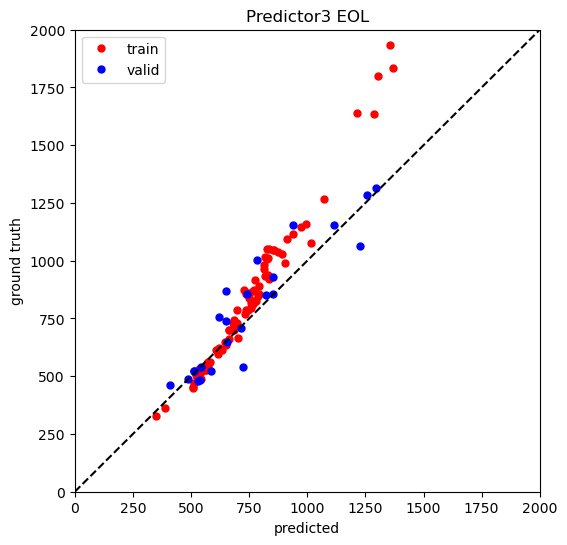

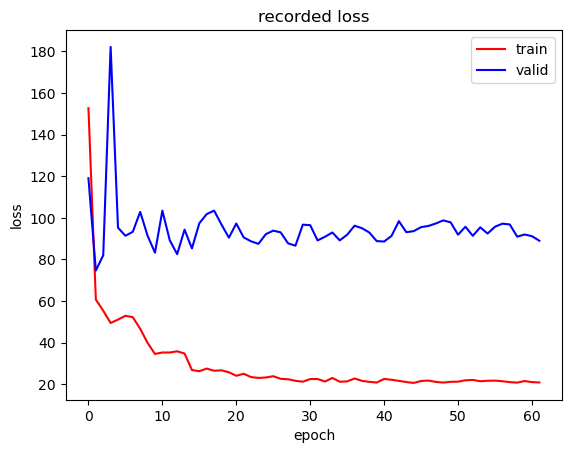

In [4]:
import gc

gc.collect()
torch.cuda.empty_cache()
################### Check file path #####################
set_code = 'state102'
model_num = 'md6'
file_tag = 'dim1trial3e24_dim2trial2'
dimreduct1_path = 'Full_model\Saved_dimreduct1\state102trial3\epoch24'
dimreduct2_path = 'Full_model/dimreduct2_state102trial2.pth'
dimreduct3_path = 'Full_model/dimreduct3_state102trial1.pth'
dimreduct4_path = 'Full_model/dimreduct4_state102trial1.pth'
########################################################

##########Predictor3###########
dataset_preprocessing_Predictor3(cycle_used=100,
                                    dimreduct1_path=dimreduct1_path,
                                    dimreduct2_path=dimreduct2_path,
                                    dimreduct3_path=dimreduct3_path,
                                    dimreduct4_path=dimreduct4_path,
                                    set_code=set_code,
                                    file_tag=file_tag)
# load dataset
train_dataset = Predictor3_dataset(train=True, norm=True, eval=False, padding=True, set_code=set_code, file_tag=file_tag)
test_dataset = Predictor3_dataset(train=False, norm=True, eval=True, padding=True, set_code=set_code, file_tag=file_tag)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=True)

# load model
predictor3 = Predictor_3(in_ch=10, out_ch=1, drop=0.4).cuda()

predictor3_model, train_loss, valid_loss = predictor3_train_RLROP(predictor3, train_loader, test_loader,
                                                                  patience=60,
                                                                  lr=1e-2,
                                                                  factor=0.3,
                                                                  scheduler_patience=5,
                                                                  min_lr=1e-07,
                                                                  weight_decay=0.08,
                                                                  loss_func='L1',
                                                                  verbose=True,
                                                                  state_dict_path=set_code+model_num)

predictor3_file = 'Full_model/predictor3_'+set_code+model_num+'.pth'
torch.save(predictor3_model, predictor3_file)
print('Predictor1 saved path: '+predictor3_file)
print('Predictor1 training is done.')

predictor3_eval(predictor3_model, cycle_used=100, train_batch_size=91, test_batch_size=24, set_code=set_code, file_tag=file_tag)
loss_plot(train_loss, valid_loss)
##########Predictor3###########

Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 89.24, MAPE: 0.04
Testing set|RMSE: 84.43, MAPE: 0.09


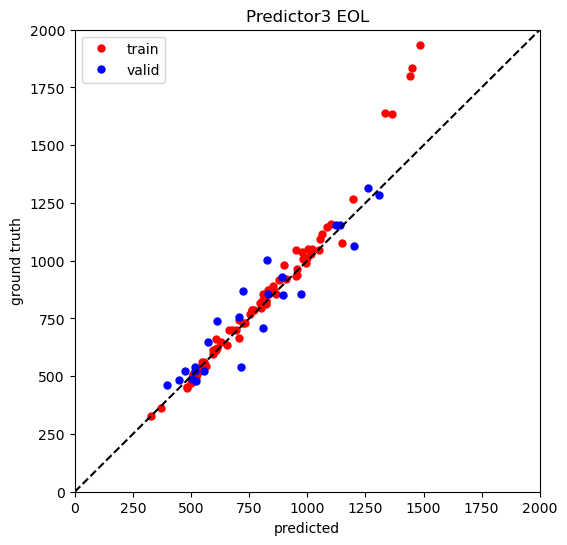

(89.23786163330078, 84.43378448486328)

In [2]:
predictor3_eval(torch.load('Full_model/predictor3_state102md1.pth'), cycle_used=100, train_batch_size=91, test_batch_size=24, set_code='state102', file_tag='')

Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.34, MAPE: 0.06
Testing set|RMSE: 84.89, MAPE: 0.09


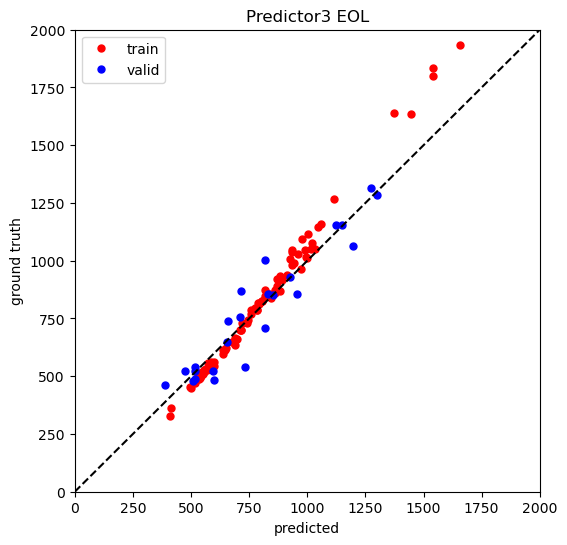

(76.34321594238281, 84.8892822265625)

In [9]:
predictor3_eval(torch.load('Full_model/predictor3_state102md3.pth'), cycle_used=100, train_batch_size=91, test_batch_size=24, set_code='state102', file_tag='alltrial1')

First 1 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 1 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 1 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 146.93, MAPE: 0.08
Testing set|RMSE: 108.99, MAPE: 0.11


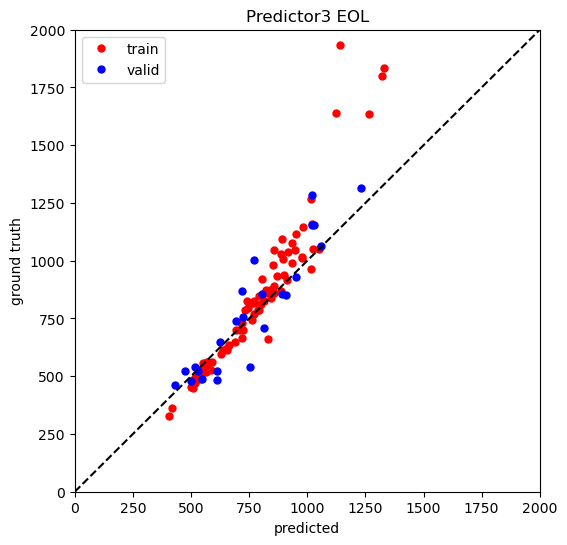

First 2 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 2 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 2 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 133.81, MAPE: 0.07
Testing set|RMSE: 94.18, MAPE: 0.10


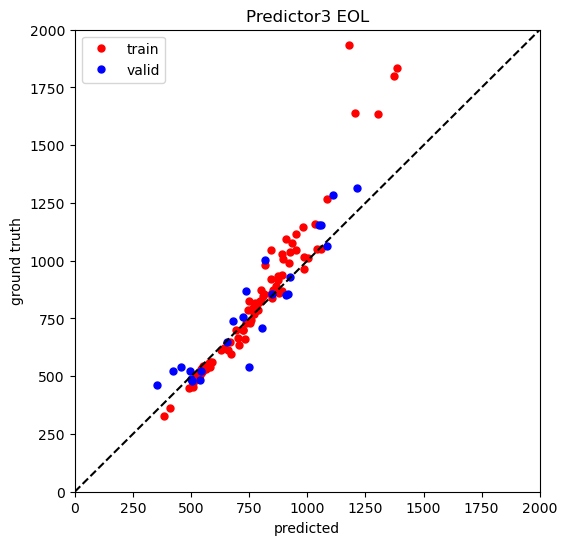

First 3 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 3 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 3 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 111.53, MAPE: 0.07
Testing set|RMSE: 93.66, MAPE: 0.10


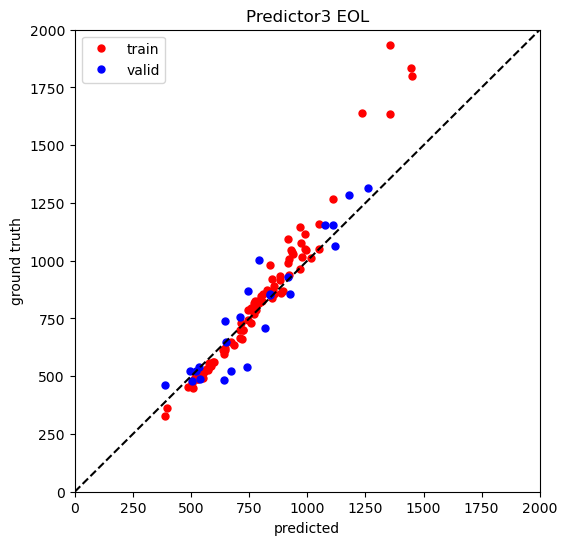

First 4 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 4 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 4 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 107.31, MAPE: 0.07
Testing set|RMSE: 88.73, MAPE: 0.09


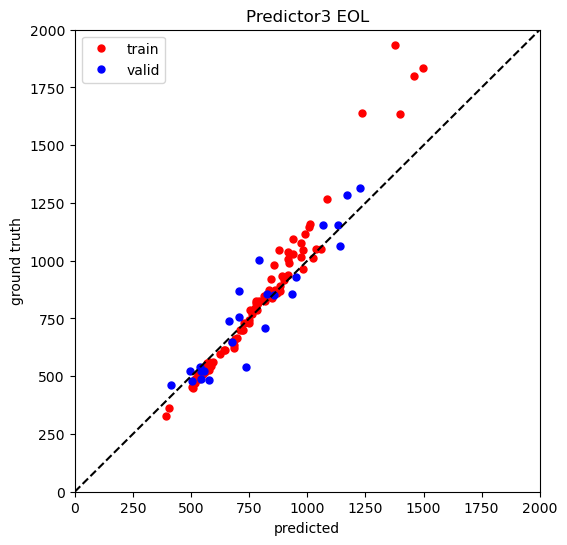

First 5 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 5 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 5 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 100.59, MAPE: 0.07
Testing set|RMSE: 85.93, MAPE: 0.10


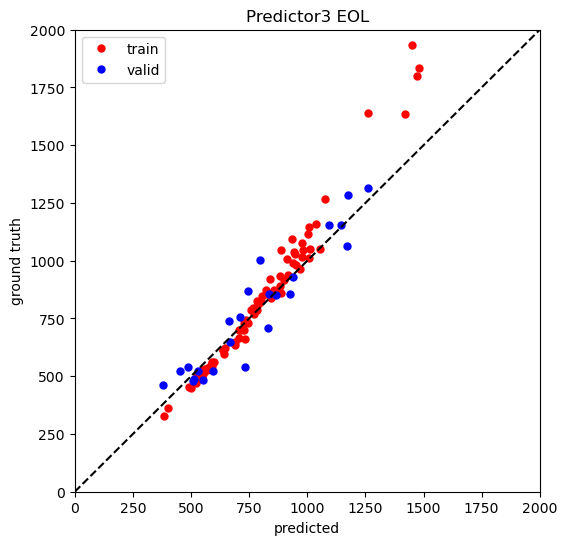

First 6 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 6 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 6 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 98.33, MAPE: 0.07
Testing set|RMSE: 86.04, MAPE: 0.10


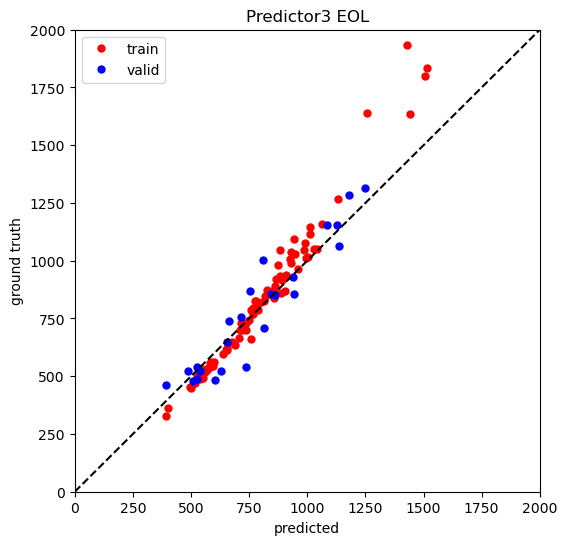

First 7 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 7 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 7 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 97.21, MAPE: 0.07
Testing set|RMSE: 87.22, MAPE: 0.09


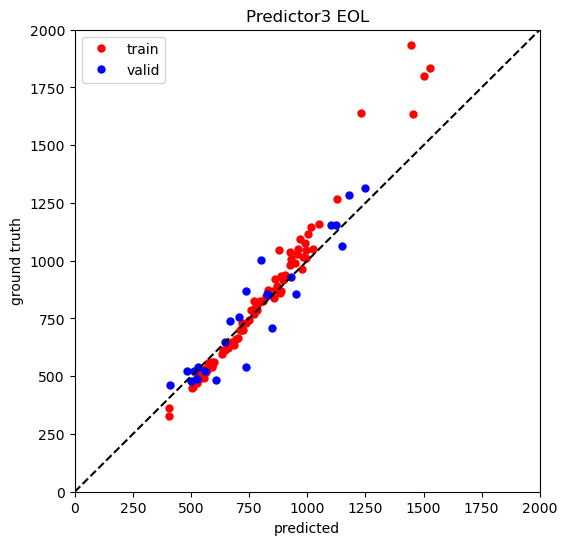

First 8 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 8 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 8 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 97.83, MAPE: 0.07
Testing set|RMSE: 85.98, MAPE: 0.10


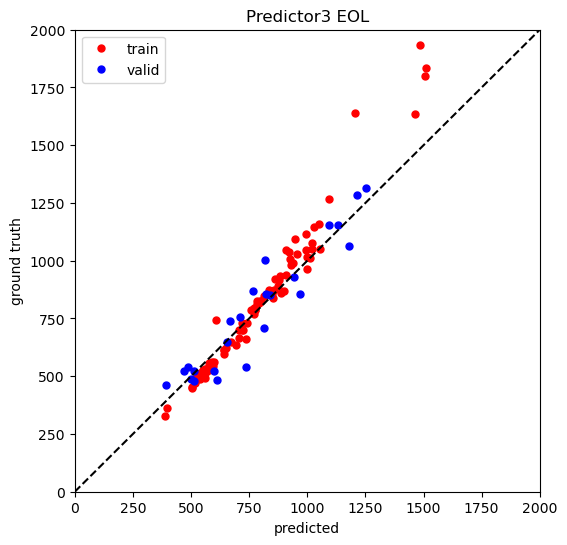

First 9 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 9 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 9 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 100.86, MAPE: 0.07
Testing set|RMSE: 85.68, MAPE: 0.10


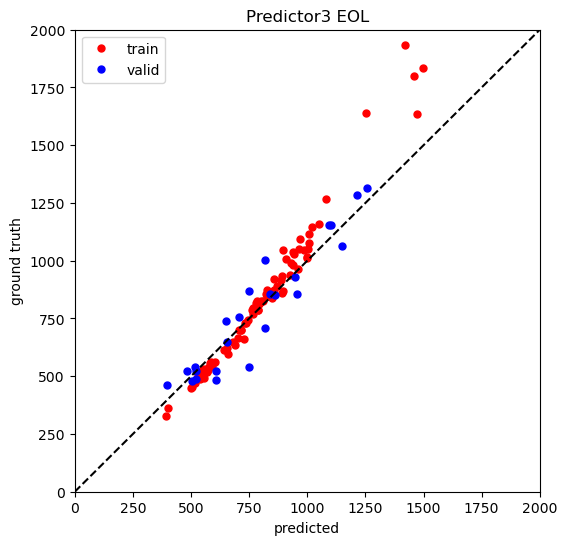

First 10 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 10 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 10 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 100.79, MAPE: 0.07
Testing set|RMSE: 83.86, MAPE: 0.09


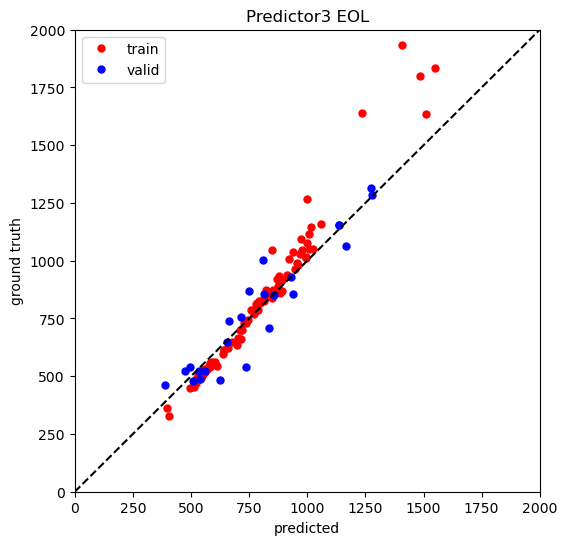

First 11 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 11 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 11 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 94.16, MAPE: 0.06
Testing set|RMSE: 83.07, MAPE: 0.09


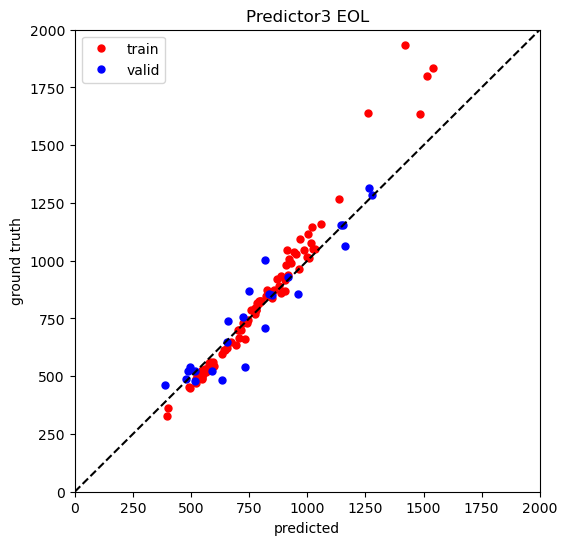

First 12 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 12 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 12 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 89.20, MAPE: 0.06
Testing set|RMSE: 87.66, MAPE: 0.10


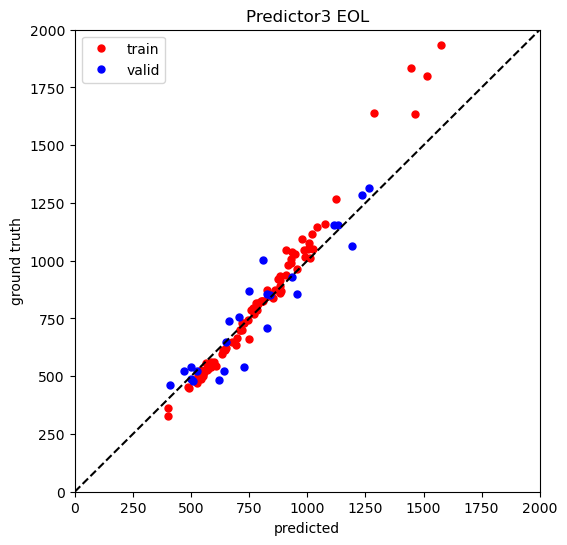

First 13 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 13 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 13 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 82.86, MAPE: 0.06
Testing set|RMSE: 83.68, MAPE: 0.09


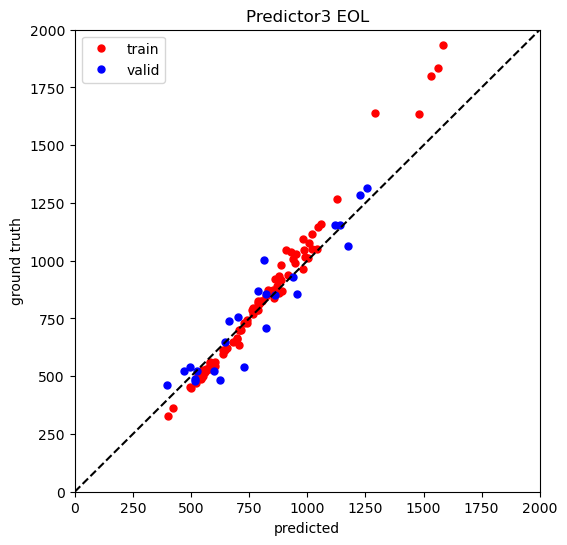

First 14 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 14 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 14 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 80.24, MAPE: 0.06
Testing set|RMSE: 91.50, MAPE: 0.10


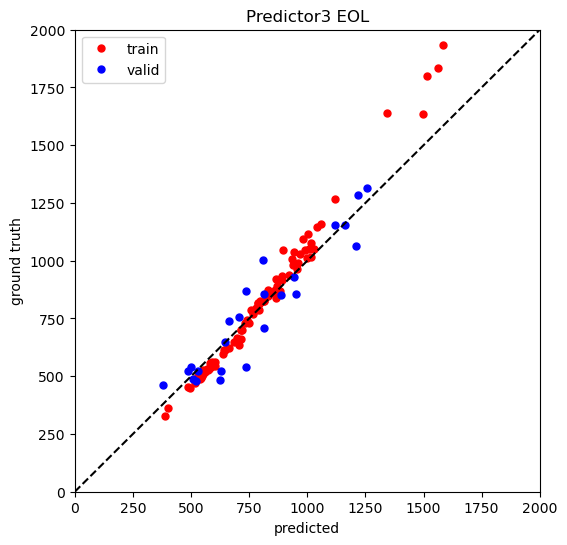

First 15 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 15 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 15 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.76, MAPE: 0.06
Testing set|RMSE: 86.16, MAPE: 0.10


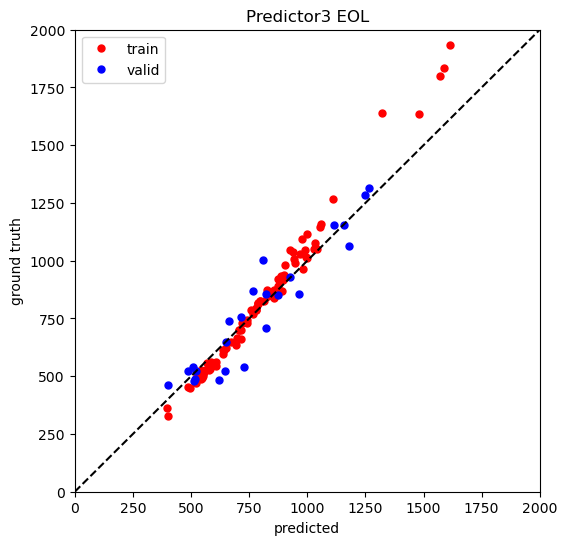

First 16 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 16 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 16 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.06, MAPE: 0.06
Testing set|RMSE: 91.13, MAPE: 0.10


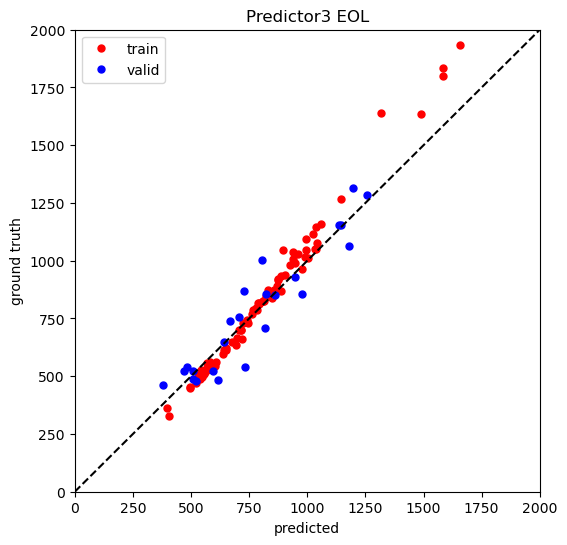

First 17 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 17 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 17 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 72.60, MAPE: 0.06
Testing set|RMSE: 92.44, MAPE: 0.10


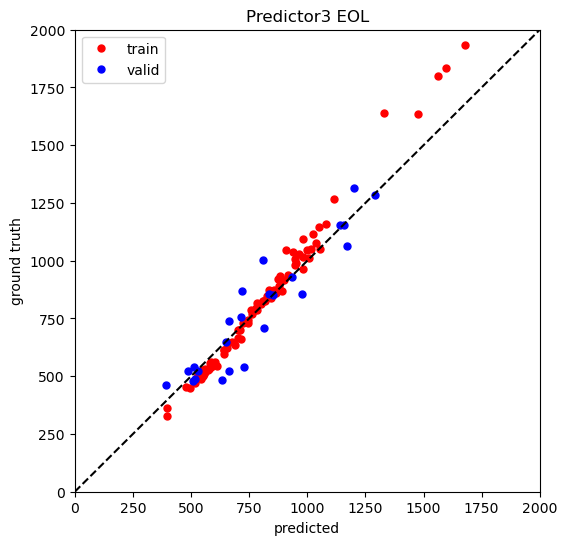

First 18 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 18 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 18 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.67, MAPE: 0.06
Testing set|RMSE: 90.06, MAPE: 0.09


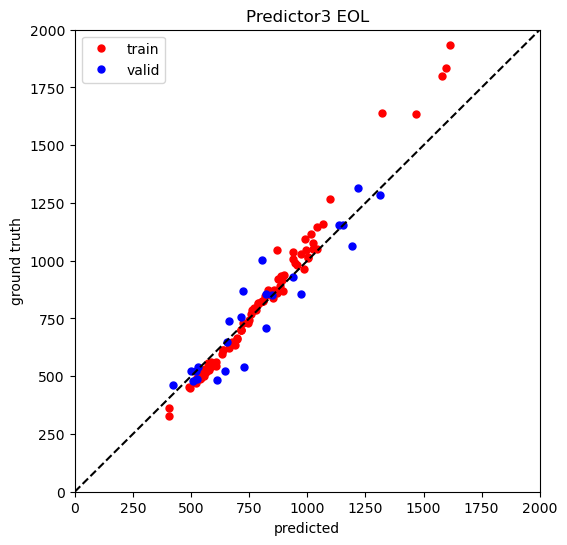

First 19 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 19 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 19 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.74, MAPE: 0.06
Testing set|RMSE: 90.73, MAPE: 0.10


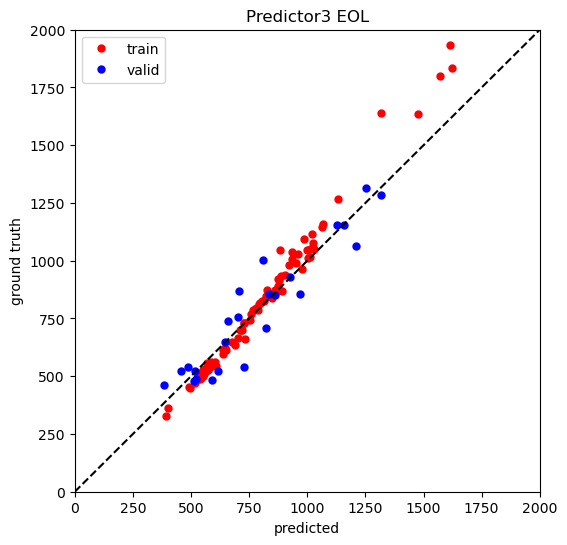

First 20 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 20 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 20 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.61, MAPE: 0.06
Testing set|RMSE: 91.15, MAPE: 0.10


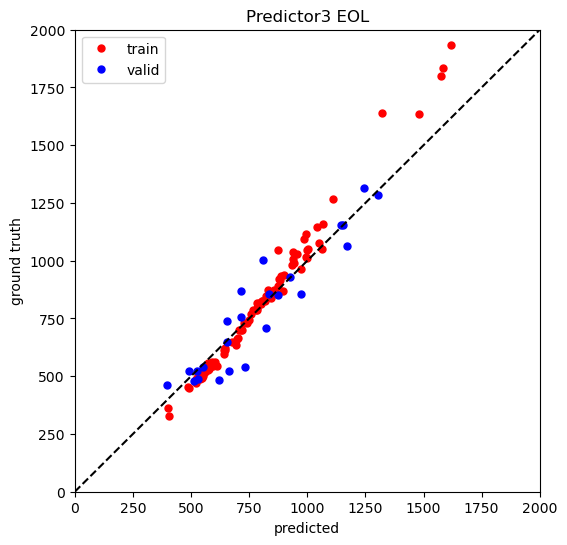

First 21 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 21 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 21 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.12, MAPE: 0.06
Testing set|RMSE: 89.67, MAPE: 0.09


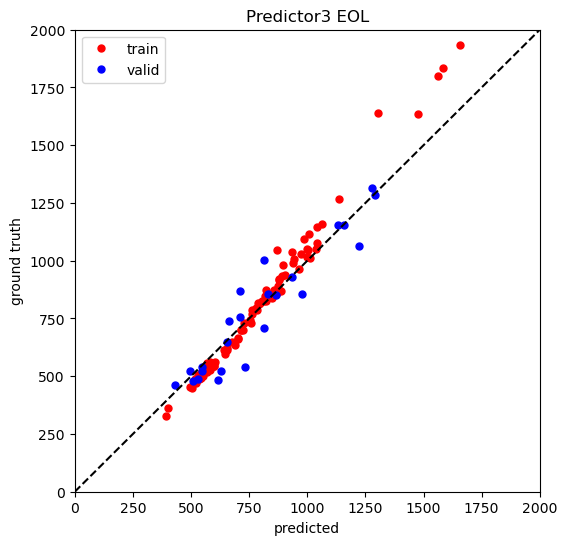

First 22 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 22 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 22 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 78.28, MAPE: 0.06
Testing set|RMSE: 89.53, MAPE: 0.10


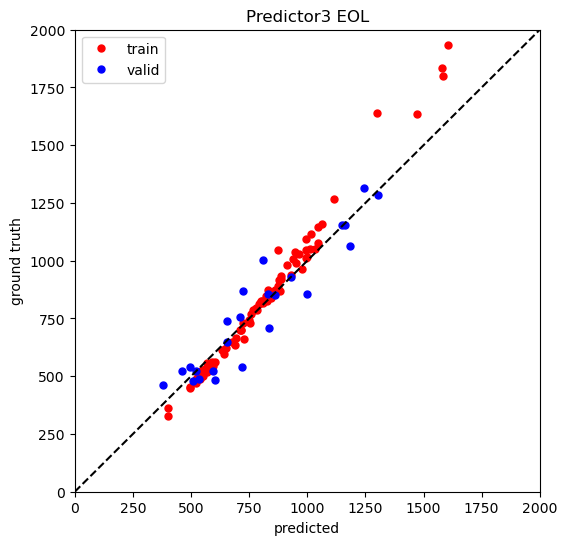

First 23 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 23 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 23 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.27, MAPE: 0.06
Testing set|RMSE: 90.74, MAPE: 0.10


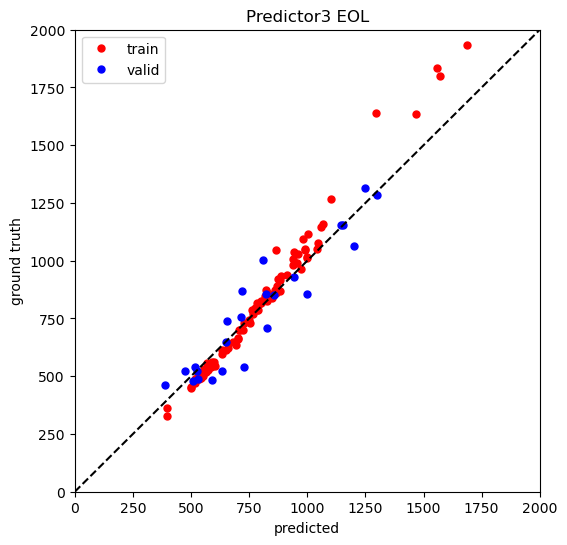

First 24 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 24 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 24 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 80.26, MAPE: 0.06
Testing set|RMSE: 88.38, MAPE: 0.09


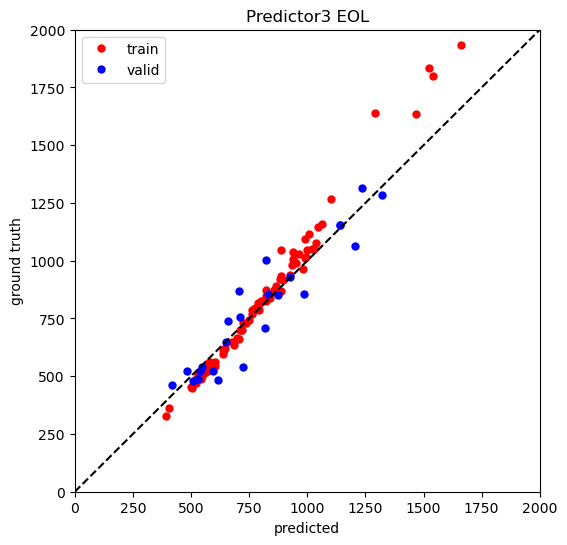

First 25 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 25 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 25 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.53, MAPE: 0.06
Testing set|RMSE: 87.54, MAPE: 0.10


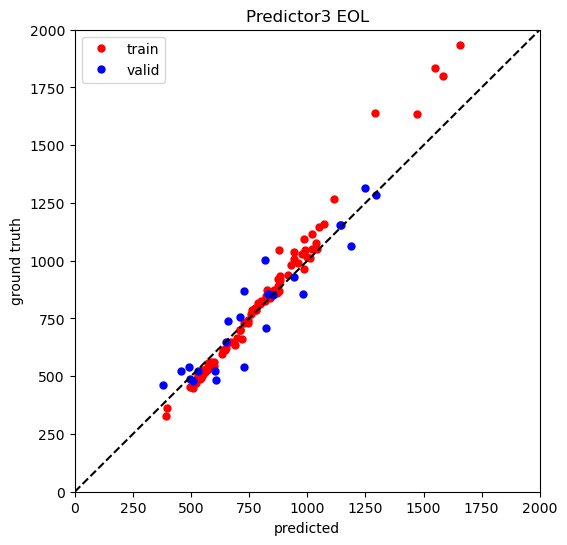

First 26 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 26 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 26 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 81.08, MAPE: 0.06
Testing set|RMSE: 88.87, MAPE: 0.10


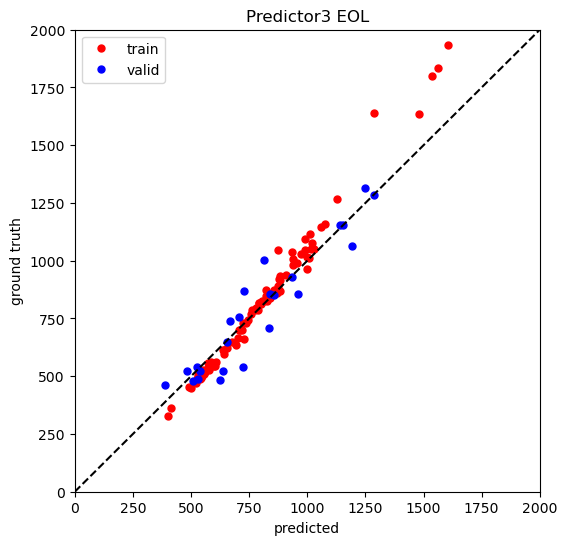

First 27 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 27 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 27 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.54, MAPE: 0.06
Testing set|RMSE: 86.44, MAPE: 0.09


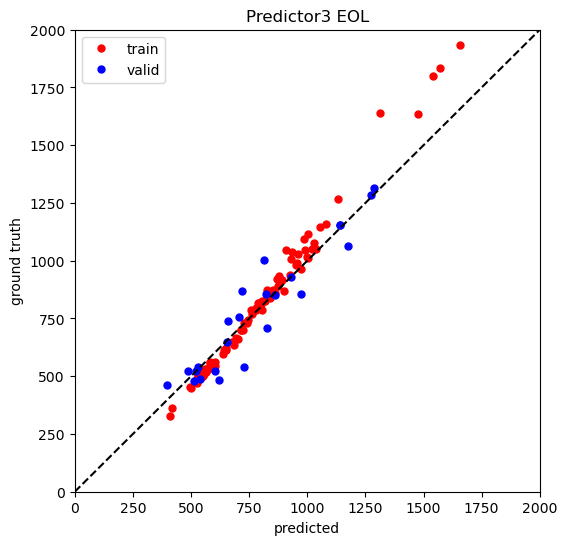

First 28 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 28 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 28 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.15, MAPE: 0.06
Testing set|RMSE: 89.51, MAPE: 0.10


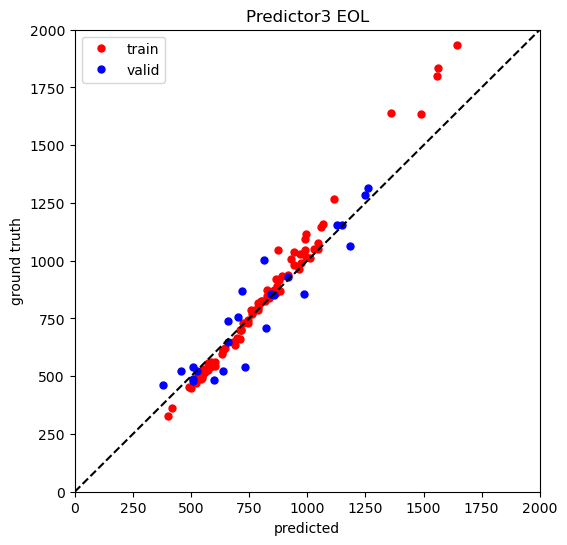

First 29 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 29 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 29 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.65, MAPE: 0.06
Testing set|RMSE: 89.00, MAPE: 0.10


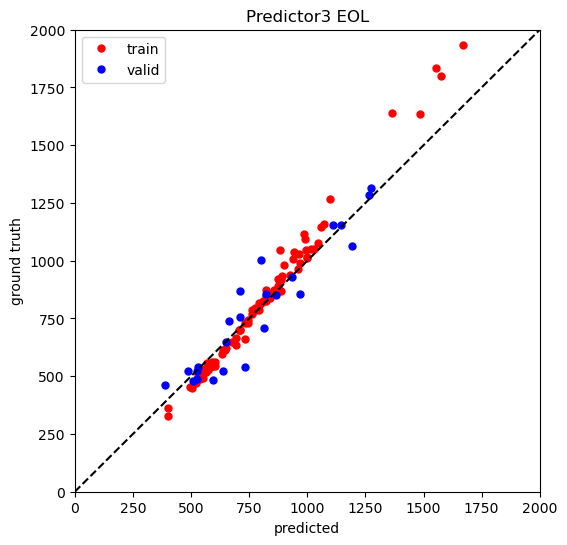

First 30 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 30 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 30 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.56, MAPE: 0.06
Testing set|RMSE: 85.89, MAPE: 0.10


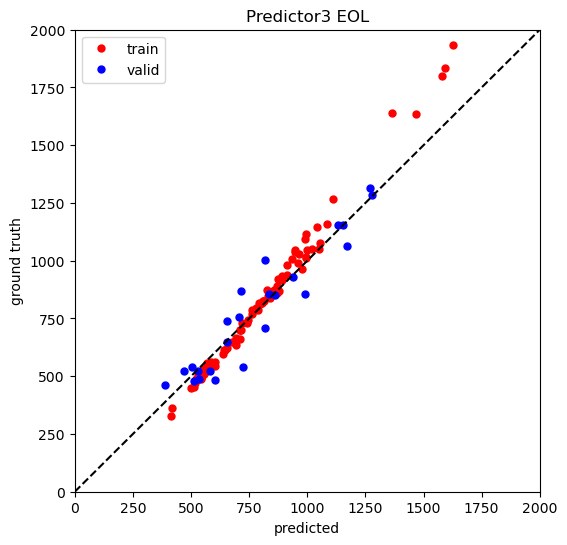

First 31 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 31 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 31 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 70.65, MAPE: 0.06
Testing set|RMSE: 86.38, MAPE: 0.09


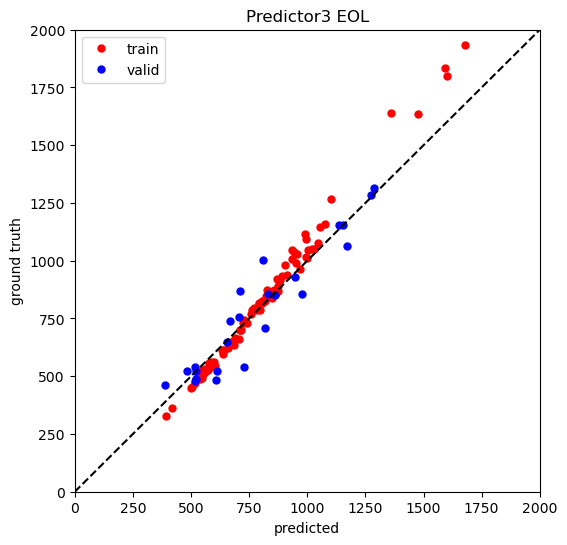

First 32 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 32 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 32 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.85, MAPE: 0.06
Testing set|RMSE: 87.65, MAPE: 0.09


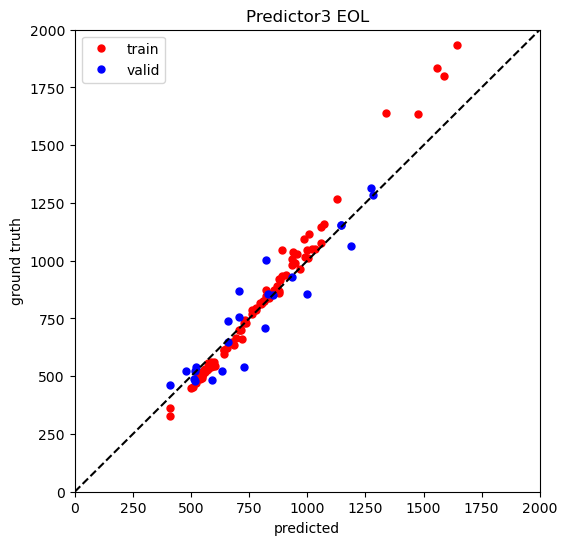

First 33 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 33 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 33 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.07, MAPE: 0.06
Testing set|RMSE: 88.18, MAPE: 0.09


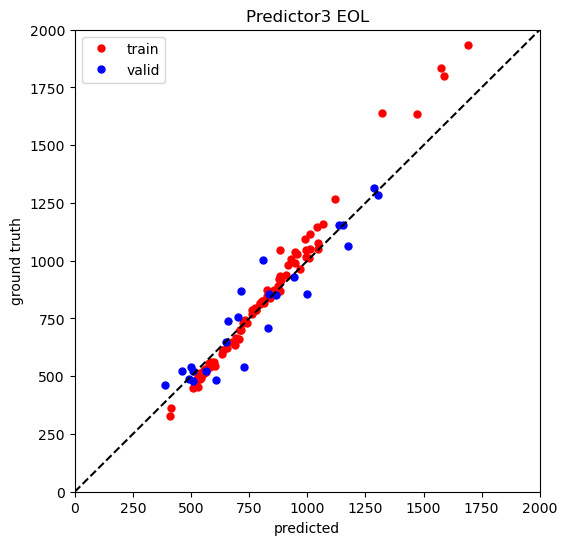

First 34 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 34 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 34 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.65, MAPE: 0.06
Testing set|RMSE: 86.70, MAPE: 0.09


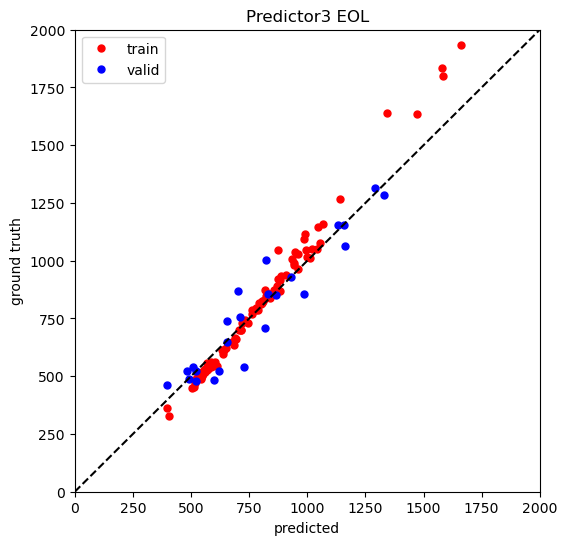

First 35 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 35 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 35 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.94, MAPE: 0.06
Testing set|RMSE: 88.01, MAPE: 0.09


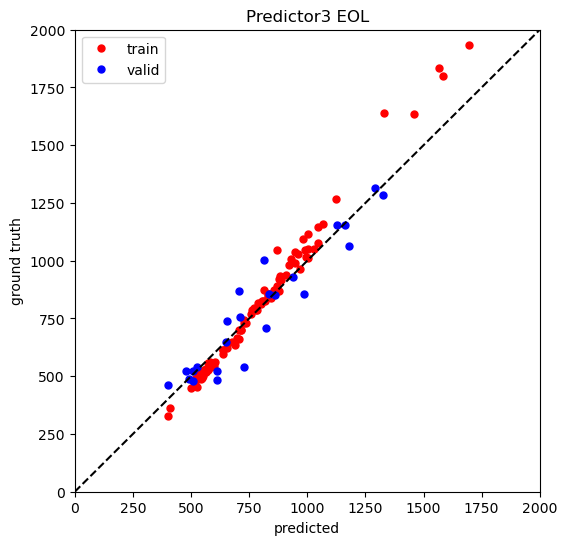

First 36 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 36 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 36 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.46, MAPE: 0.06
Testing set|RMSE: 86.93, MAPE: 0.09


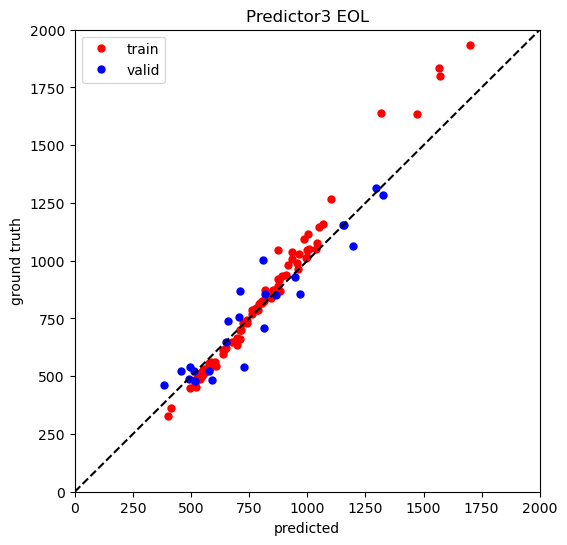

First 37 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 37 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 37 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.65, MAPE: 0.06
Testing set|RMSE: 88.19, MAPE: 0.10


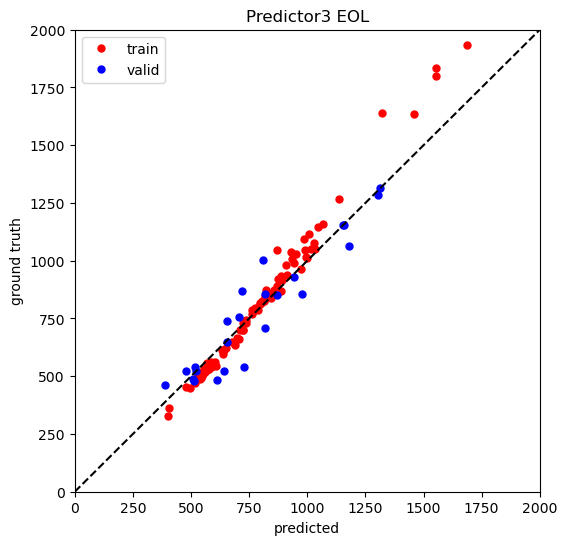

First 38 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 38 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 38 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 79.24, MAPE: 0.06
Testing set|RMSE: 86.76, MAPE: 0.09


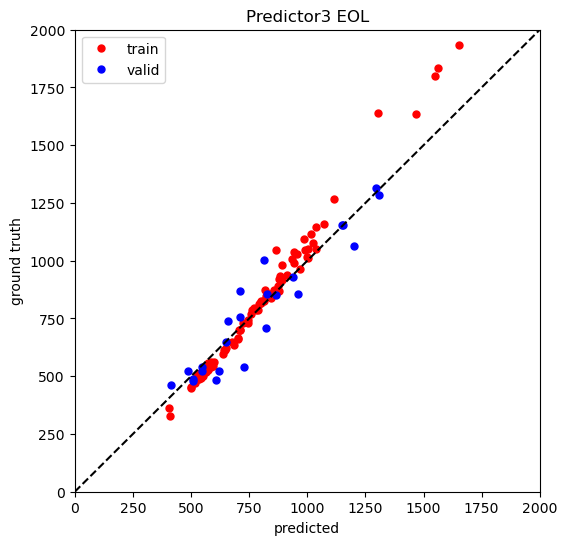

First 39 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 39 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 39 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.13, MAPE: 0.06
Testing set|RMSE: 87.02, MAPE: 0.10


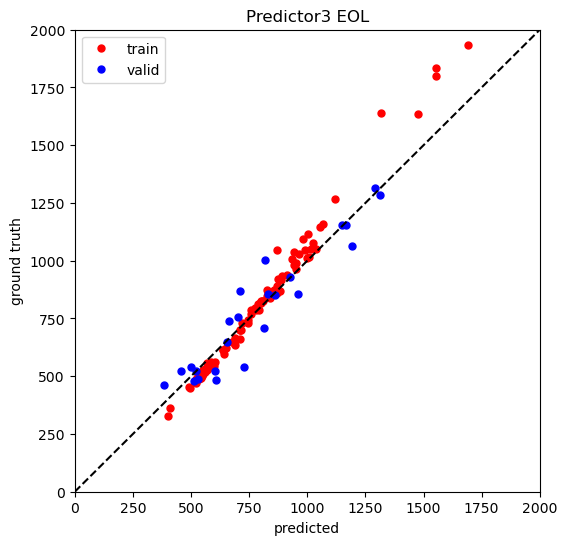

First 40 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 40 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 40 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.90, MAPE: 0.06
Testing set|RMSE: 87.06, MAPE: 0.10


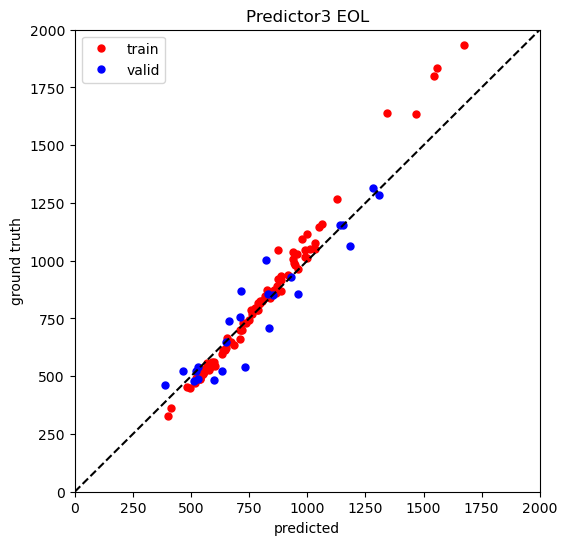

First 41 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 41 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 41 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.42, MAPE: 0.06
Testing set|RMSE: 84.51, MAPE: 0.09


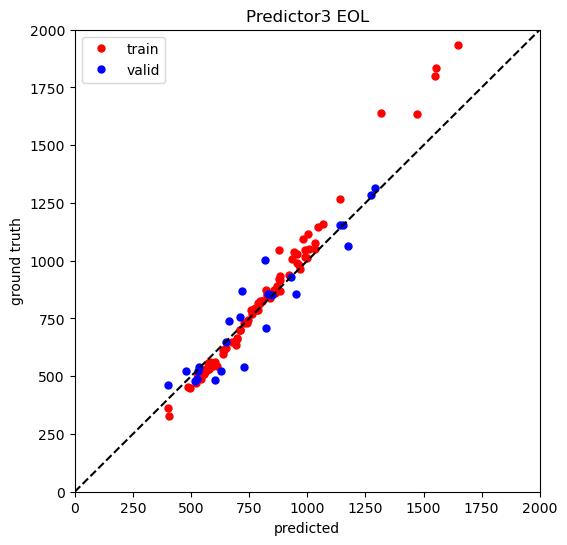

First 42 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 42 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 42 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.51, MAPE: 0.06
Testing set|RMSE: 88.55, MAPE: 0.10


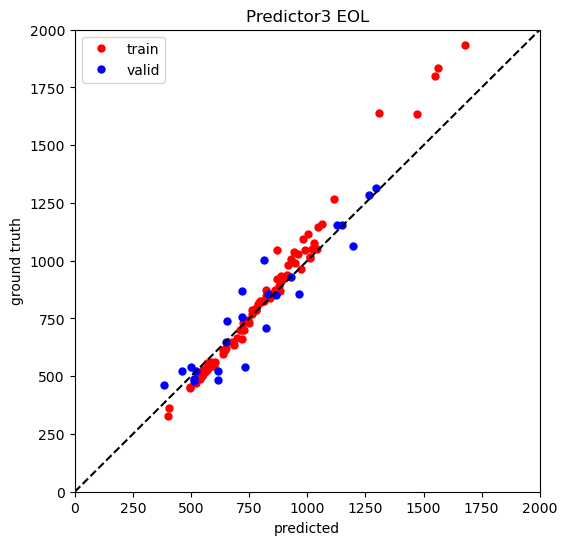

First 43 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 43 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 43 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.66, MAPE: 0.06
Testing set|RMSE: 87.24, MAPE: 0.10


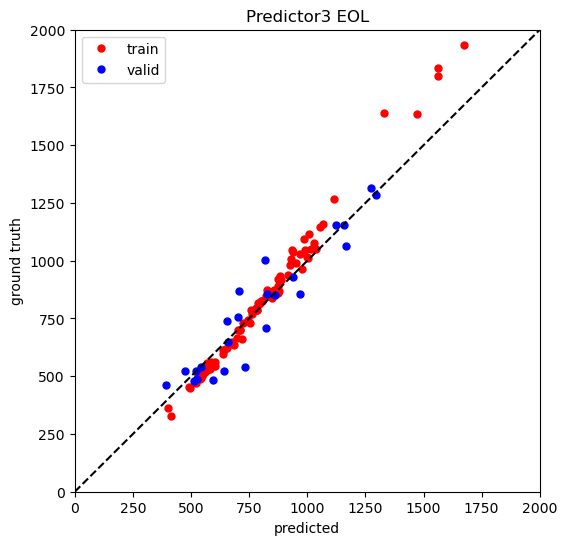

First 44 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 44 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 44 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.49, MAPE: 0.06
Testing set|RMSE: 84.95, MAPE: 0.09


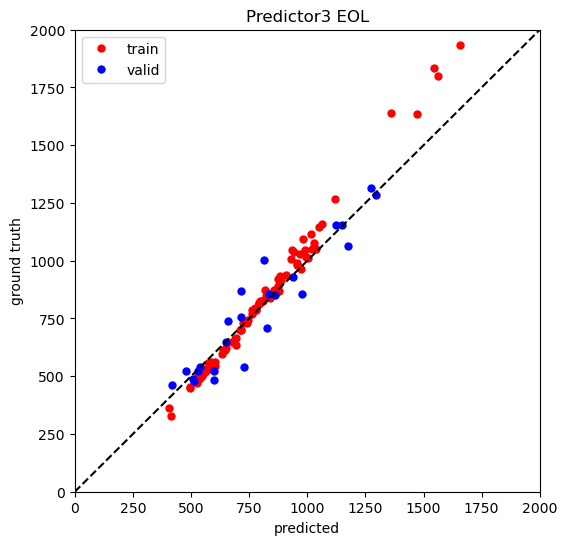

First 45 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 45 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 45 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.58, MAPE: 0.06
Testing set|RMSE: 87.47, MAPE: 0.10


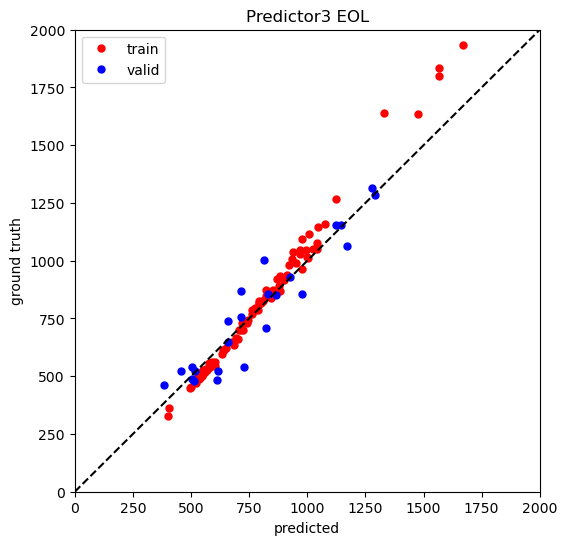

First 46 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 46 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 46 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.51, MAPE: 0.06
Testing set|RMSE: 87.68, MAPE: 0.09


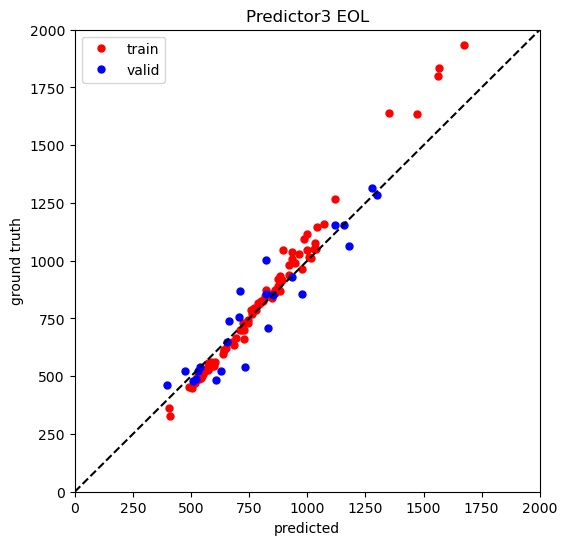

First 47 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 47 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 47 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.36, MAPE: 0.06
Testing set|RMSE: 88.20, MAPE: 0.10


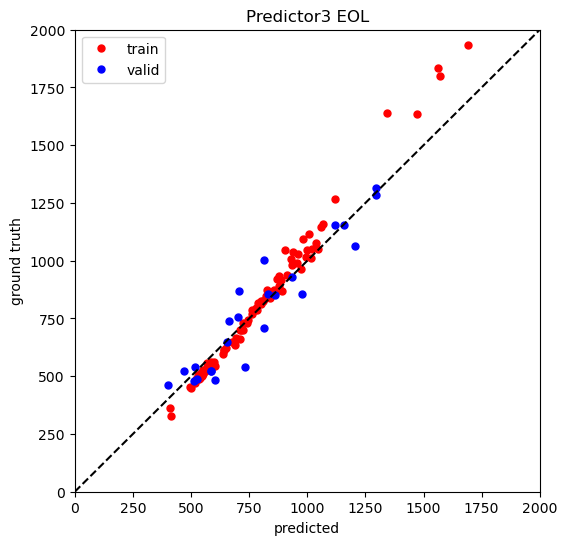

First 48 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 48 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 48 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.79, MAPE: 0.06
Testing set|RMSE: 88.82, MAPE: 0.10


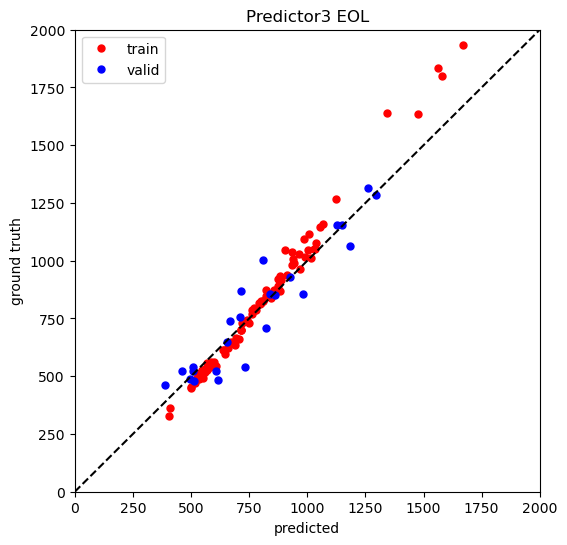

First 49 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 49 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 49 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.15, MAPE: 0.06
Testing set|RMSE: 86.47, MAPE: 0.09


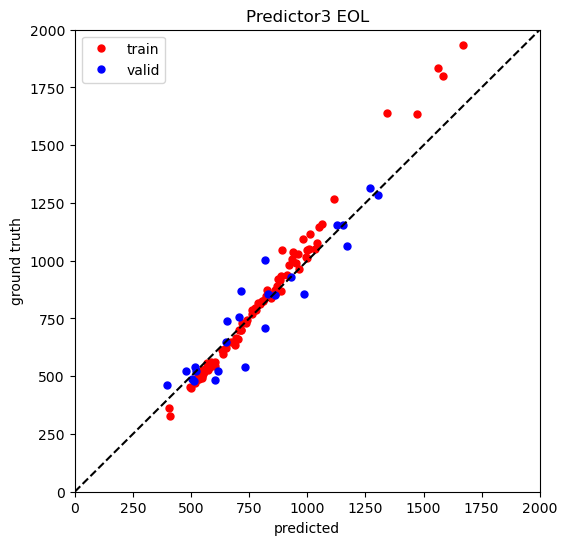

First 50 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 50 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 50 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.61, MAPE: 0.06
Testing set|RMSE: 86.36, MAPE: 0.09


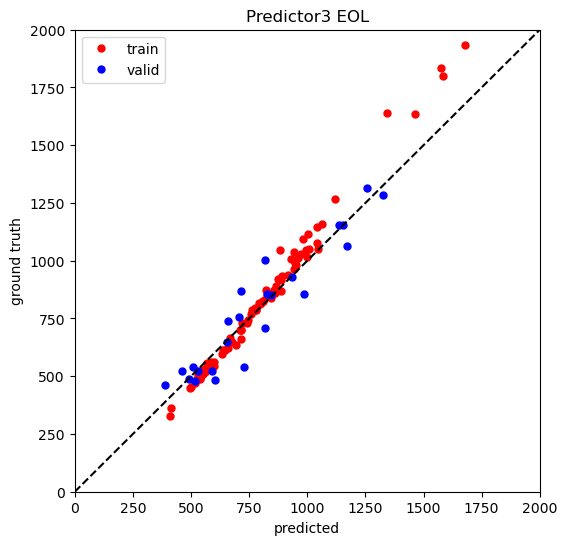

First 51 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 51 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 51 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.88, MAPE: 0.06
Testing set|RMSE: 87.09, MAPE: 0.09


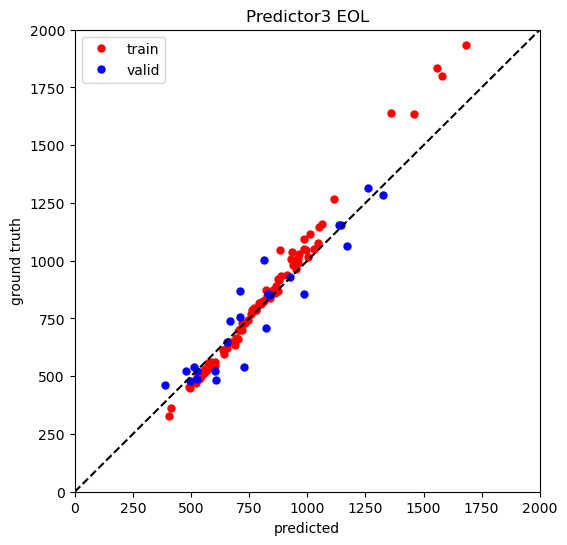

First 52 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 52 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 52 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.72, MAPE: 0.06
Testing set|RMSE: 88.35, MAPE: 0.10


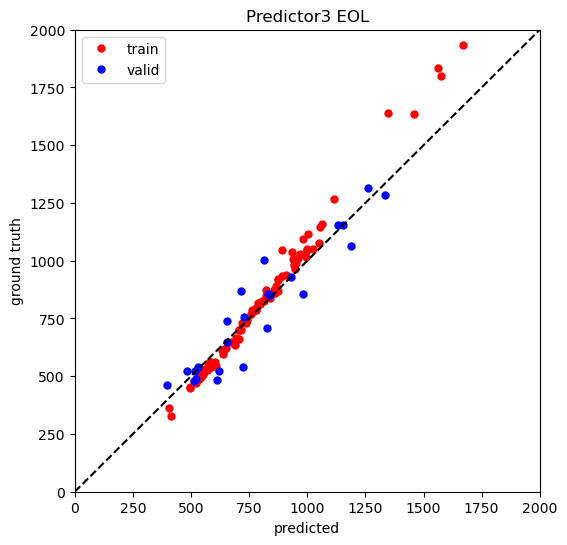

First 53 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 53 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 53 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 73.30, MAPE: 0.06
Testing set|RMSE: 83.27, MAPE: 0.09


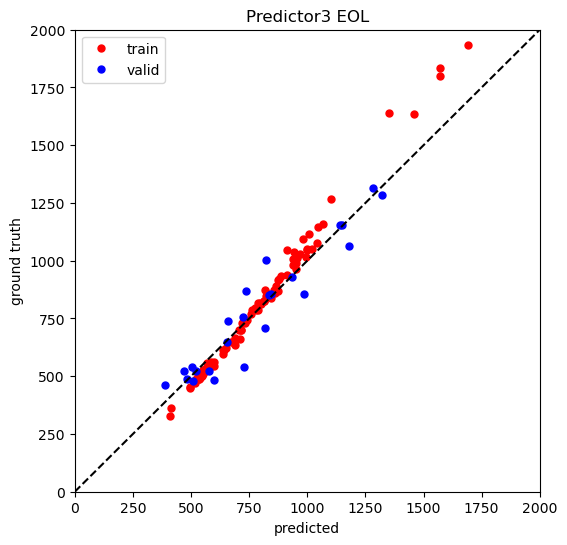

First 54 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 54 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 54 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.17, MAPE: 0.06
Testing set|RMSE: 86.46, MAPE: 0.09


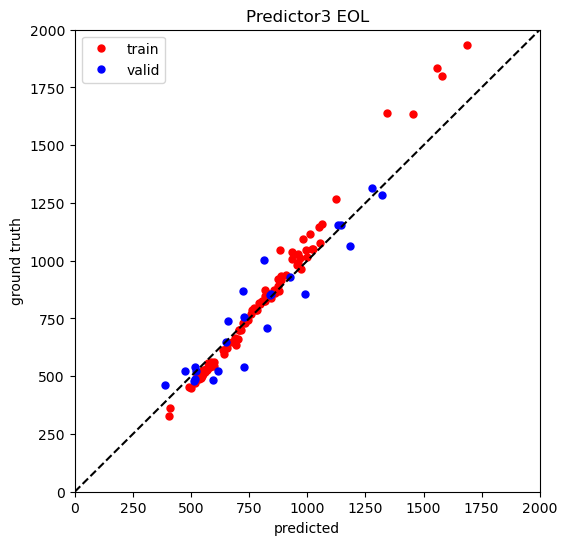

First 55 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 55 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 55 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.51, MAPE: 0.06
Testing set|RMSE: 85.19, MAPE: 0.09


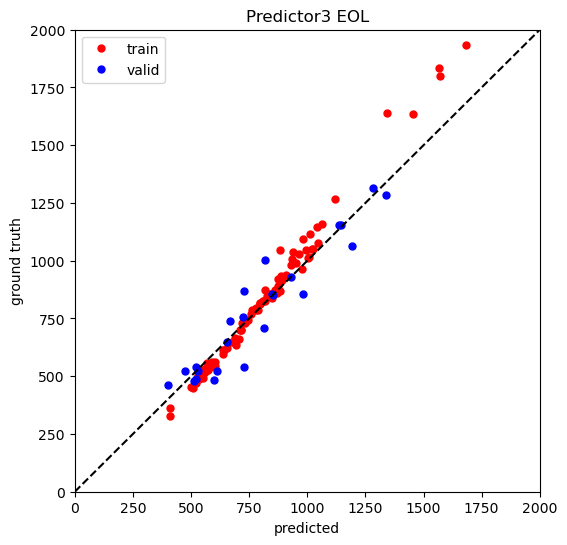

First 56 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 56 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 56 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.05, MAPE: 0.06
Testing set|RMSE: 86.54, MAPE: 0.09


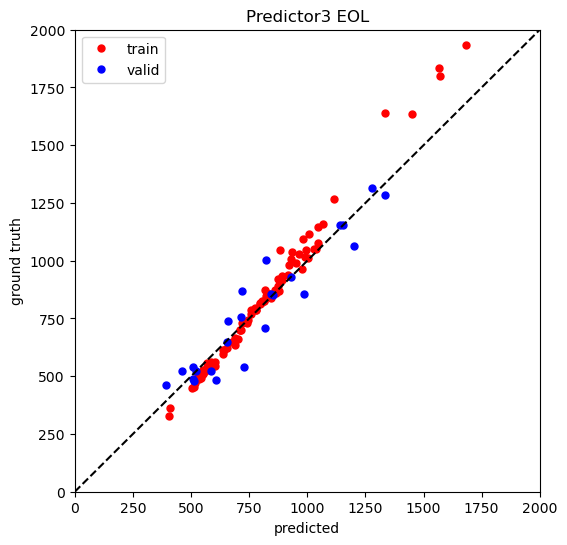

First 57 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 57 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 57 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.73, MAPE: 0.06
Testing set|RMSE: 86.64, MAPE: 0.09


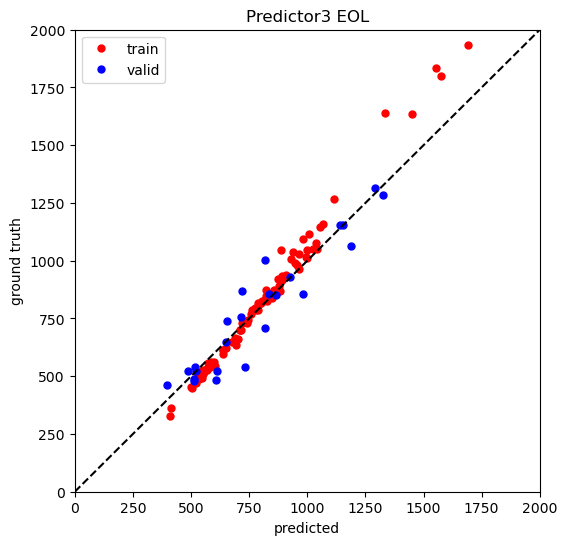

First 58 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 58 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 58 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.05, MAPE: 0.06
Testing set|RMSE: 86.81, MAPE: 0.09


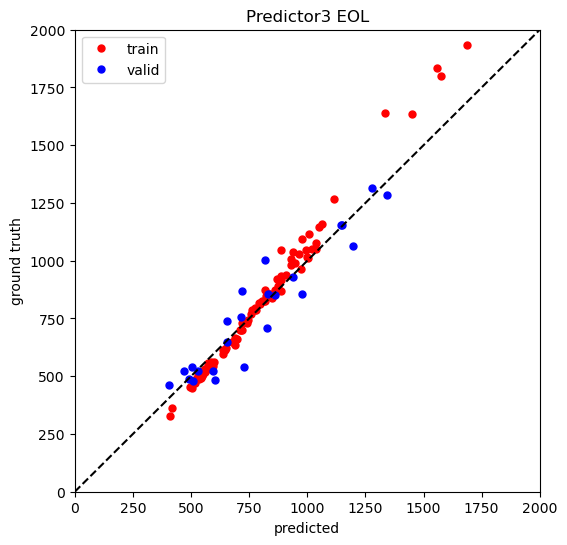

First 59 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 59 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 59 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 74.92, MAPE: 0.06
Testing set|RMSE: 86.38, MAPE: 0.09


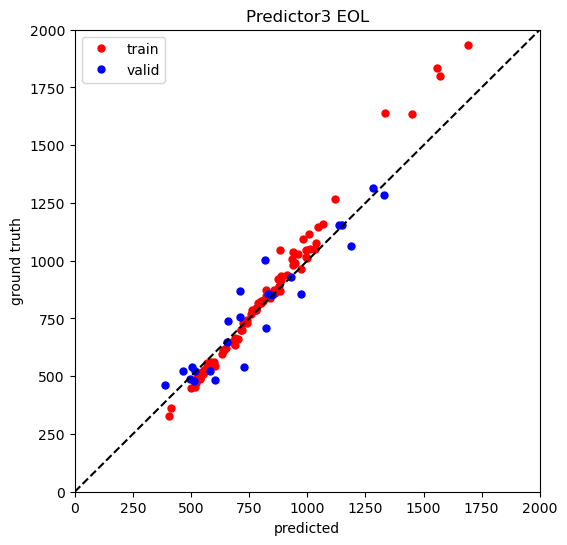

First 60 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 60 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 60 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.92, MAPE: 0.06
Testing set|RMSE: 86.54, MAPE: 0.09


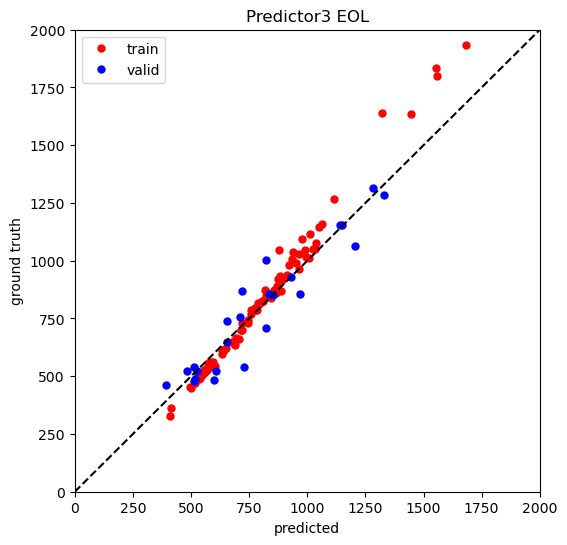

First 61 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 61 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 61 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.47, MAPE: 0.06
Testing set|RMSE: 85.58, MAPE: 0.09


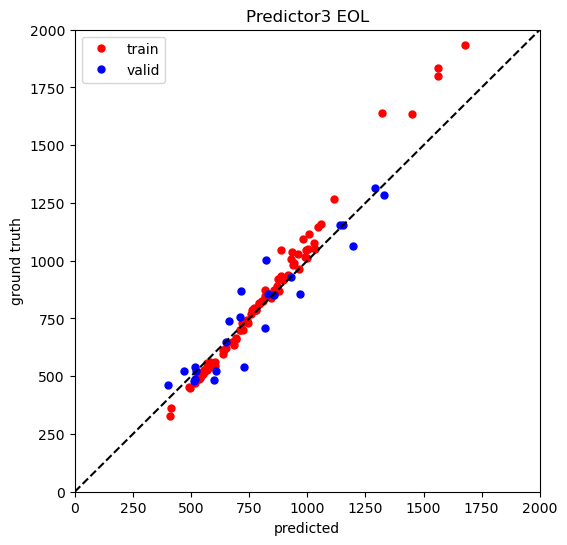

First 62 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 62 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 62 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.34, MAPE: 0.06
Testing set|RMSE: 86.71, MAPE: 0.09


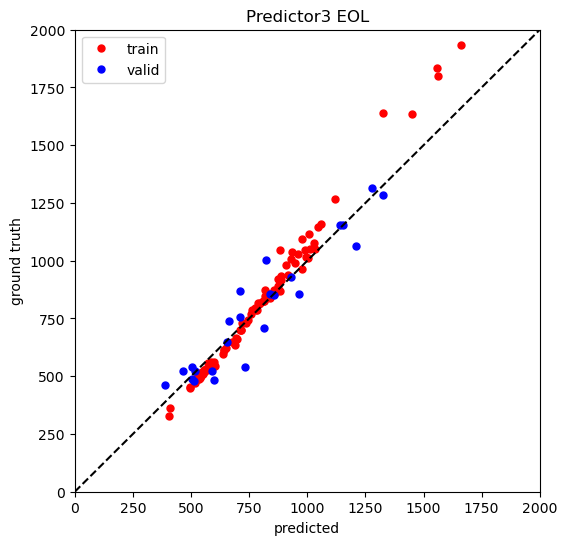

First 63 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 63 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 63 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.04, MAPE: 0.06
Testing set|RMSE: 85.85, MAPE: 0.09


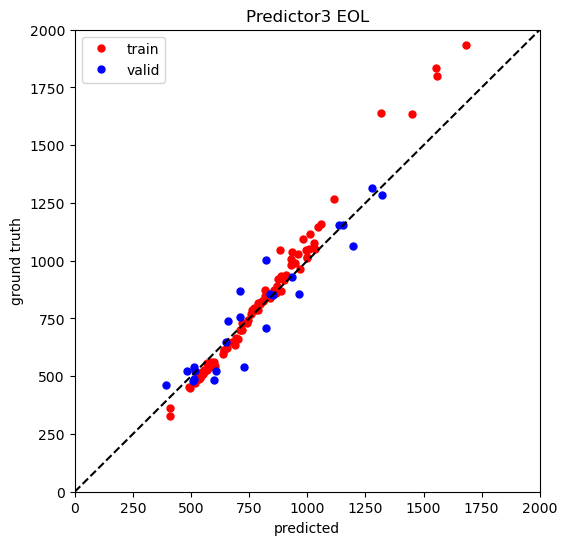

First 64 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 64 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 64 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 80.43, MAPE: 0.06
Testing set|RMSE: 84.79, MAPE: 0.09


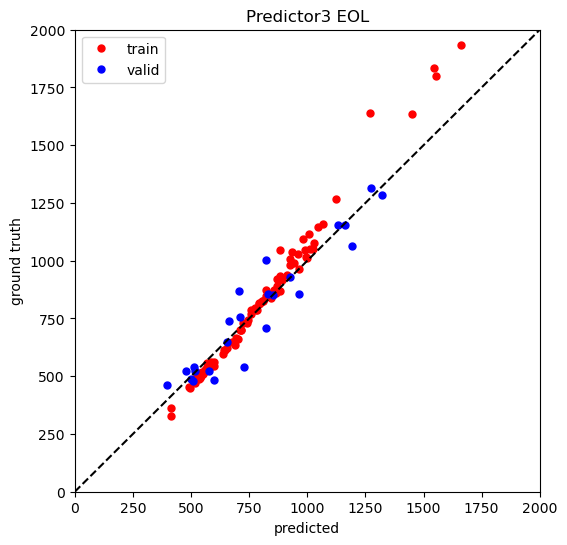

First 65 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 65 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 65 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.82, MAPE: 0.06
Testing set|RMSE: 85.36, MAPE: 0.09


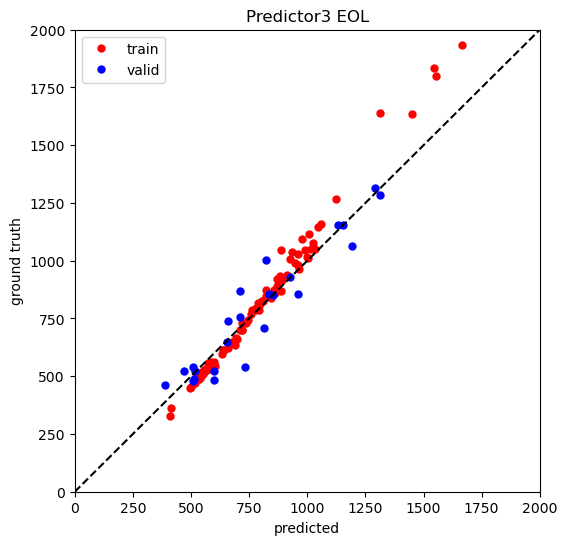

First 66 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 66 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 66 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.38, MAPE: 0.06
Testing set|RMSE: 85.26, MAPE: 0.09


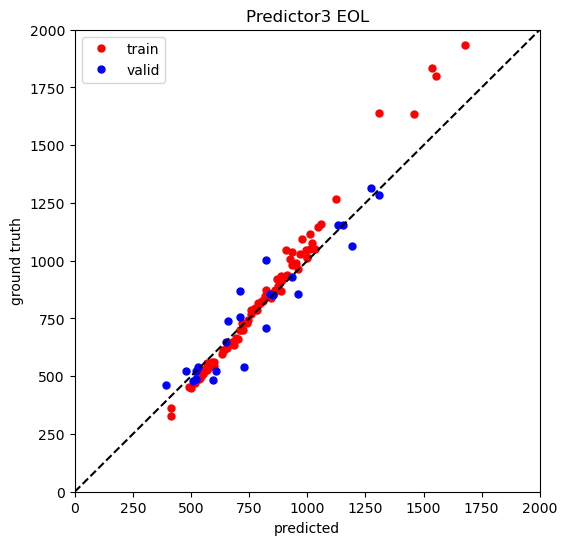

First 67 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 67 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 67 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 79.55, MAPE: 0.06
Testing set|RMSE: 84.70, MAPE: 0.09


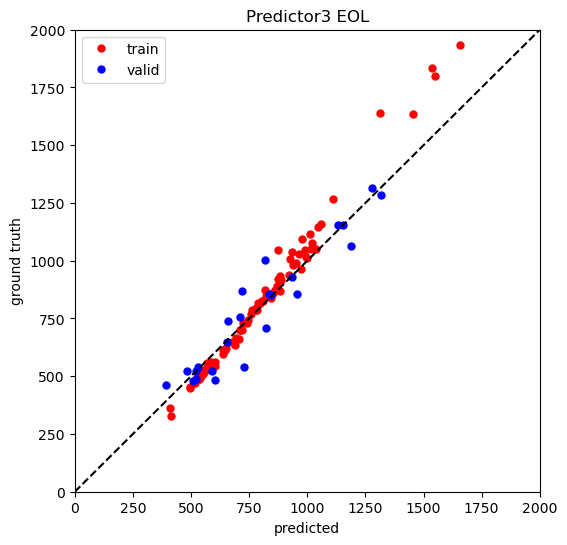

First 68 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 68 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 68 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 78.22, MAPE: 0.06
Testing set|RMSE: 83.45, MAPE: 0.09


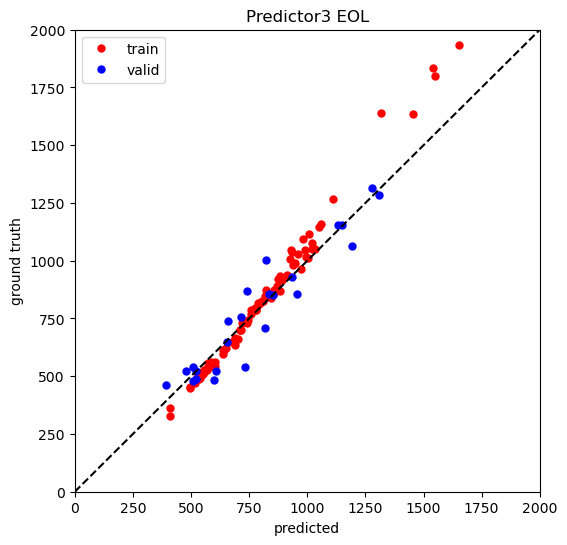

First 69 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 69 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 69 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 79.44, MAPE: 0.06
Testing set|RMSE: 84.00, MAPE: 0.09


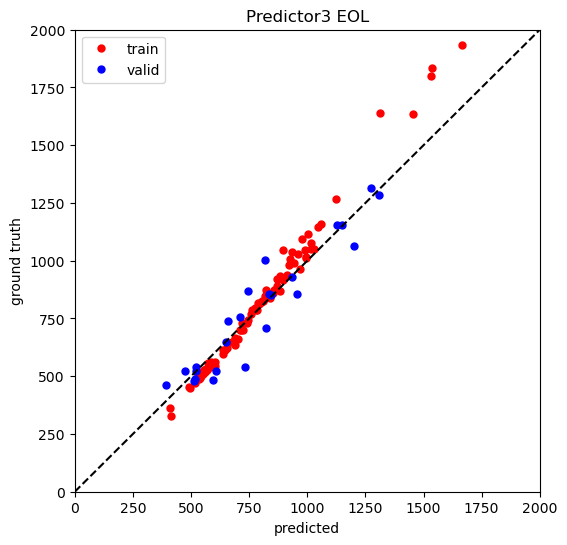

First 70 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 70 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 70 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 78.42, MAPE: 0.06
Testing set|RMSE: 82.40, MAPE: 0.09


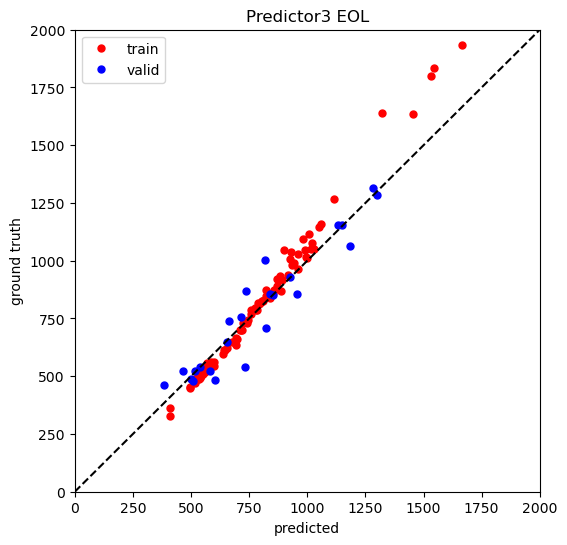

First 71 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 71 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 71 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.46, MAPE: 0.06
Testing set|RMSE: 82.36, MAPE: 0.09


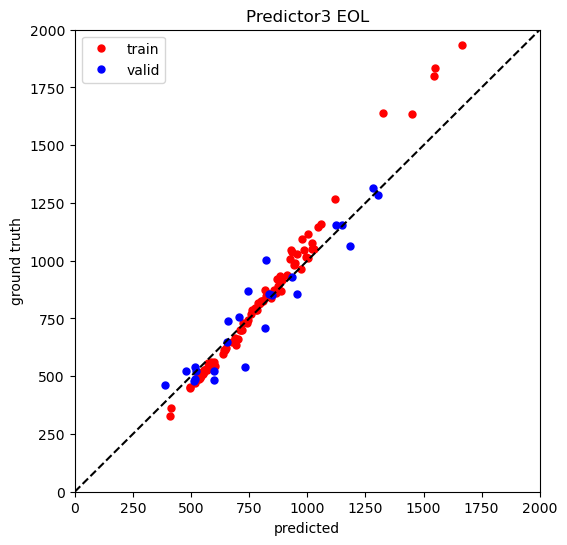

First 72 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 72 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 72 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 77.10, MAPE: 0.06
Testing set|RMSE: 84.39, MAPE: 0.09


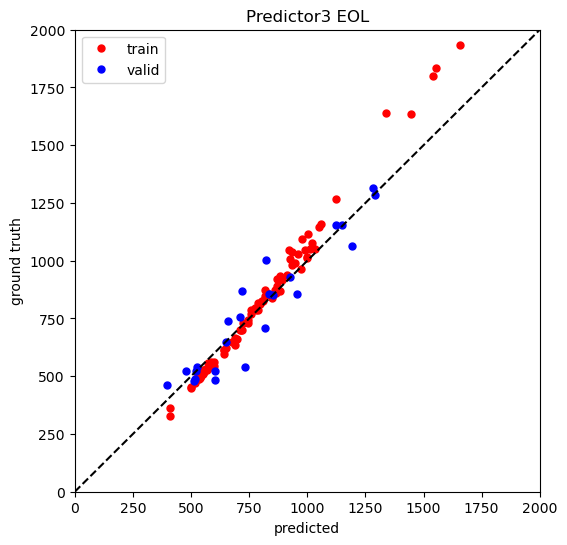

First 73 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 73 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 73 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.72, MAPE: 0.06
Testing set|RMSE: 84.25, MAPE: 0.09


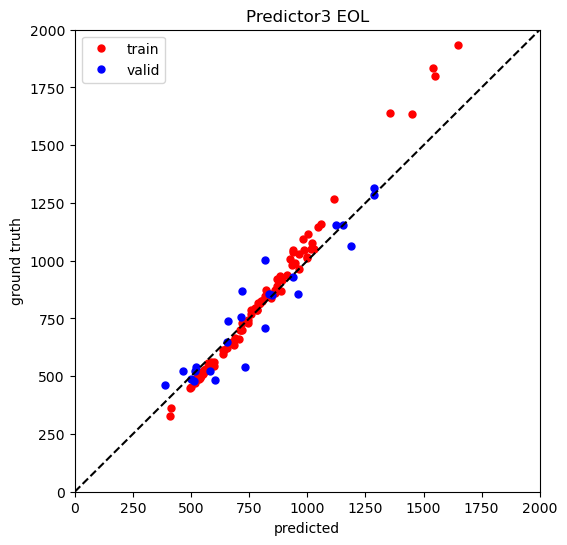

First 74 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 74 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 74 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 78.18, MAPE: 0.06
Testing set|RMSE: 84.33, MAPE: 0.09


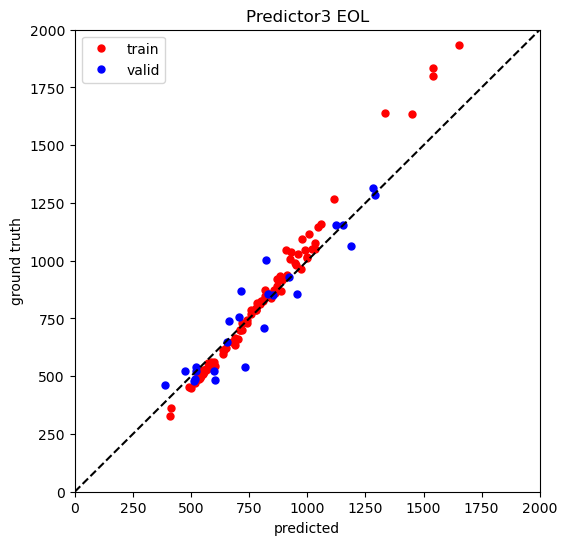

First 75 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 75 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 75 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.60, MAPE: 0.06
Testing set|RMSE: 85.37, MAPE: 0.09


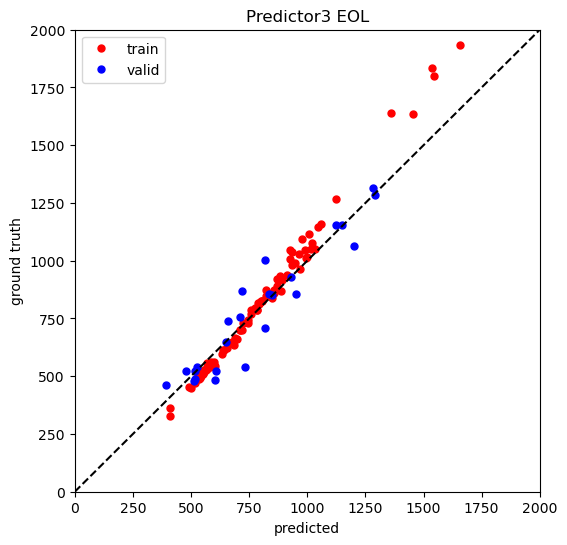

First 76 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 76 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 76 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.40, MAPE: 0.06
Testing set|RMSE: 85.39, MAPE: 0.09


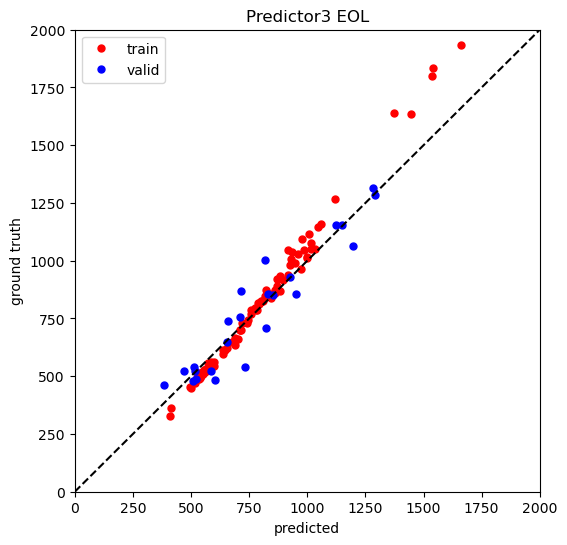

First 77 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 77 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 77 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.31, MAPE: 0.06
Testing set|RMSE: 85.02, MAPE: 0.09


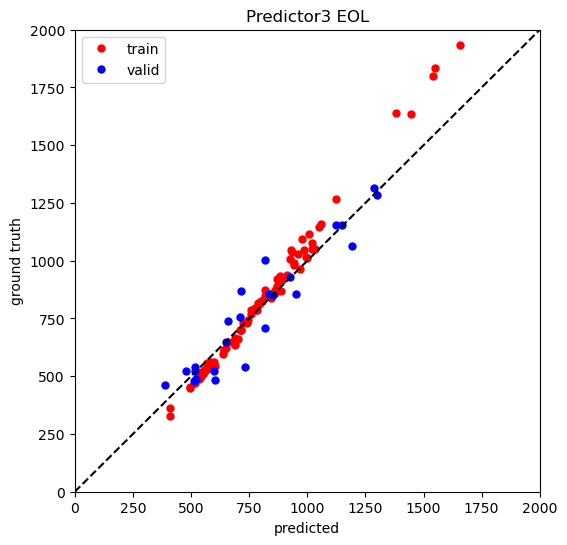

First 78 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 78 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 78 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.34, MAPE: 0.06
Testing set|RMSE: 84.46, MAPE: 0.09


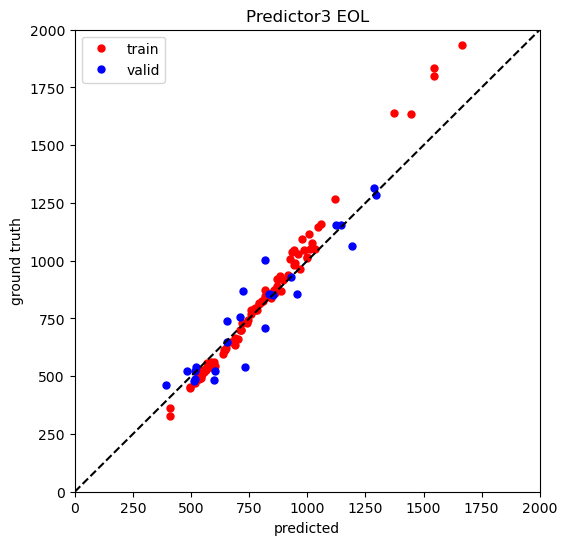

First 79 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 79 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 79 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.43, MAPE: 0.06
Testing set|RMSE: 84.49, MAPE: 0.09


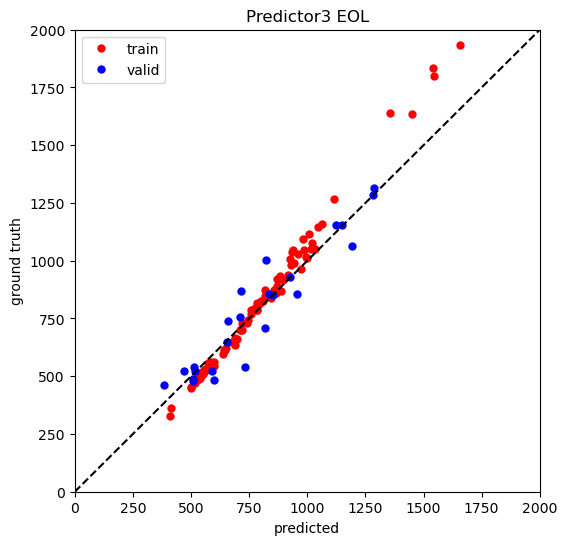

First 80 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 80 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 80 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.26, MAPE: 0.06
Testing set|RMSE: 85.07, MAPE: 0.09


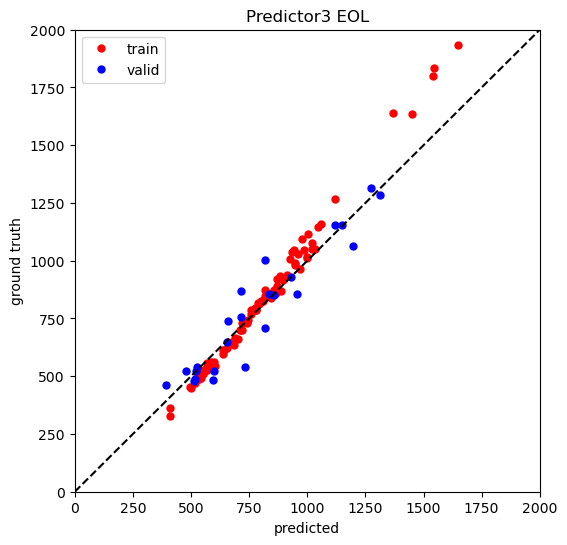

First 81 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 81 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 81 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.18, MAPE: 0.06
Testing set|RMSE: 84.02, MAPE: 0.09


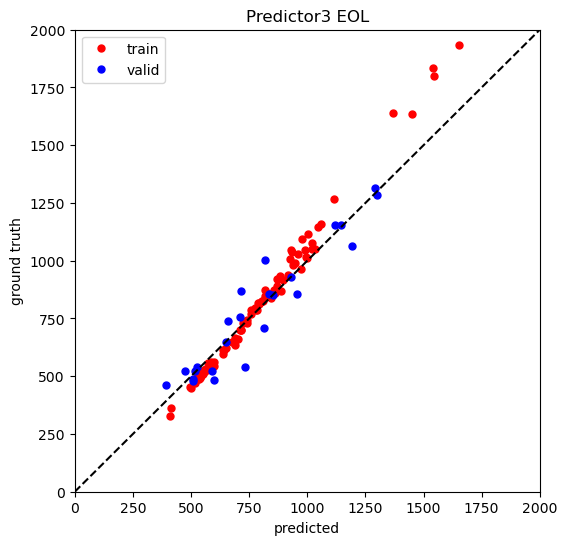

First 82 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 82 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 82 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.66, MAPE: 0.06
Testing set|RMSE: 84.77, MAPE: 0.09


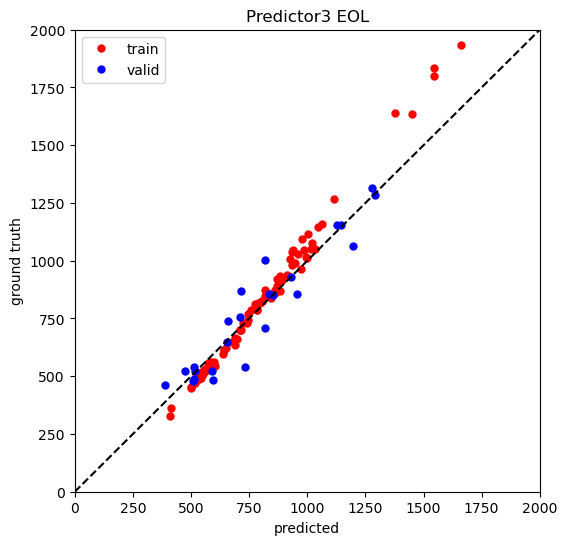

First 83 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 83 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 83 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.23, MAPE: 0.06
Testing set|RMSE: 85.11, MAPE: 0.09


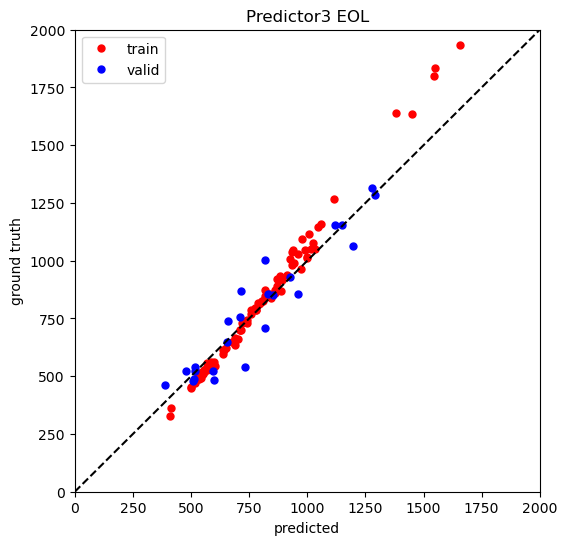

First 84 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 84 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 84 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.67, MAPE: 0.06
Testing set|RMSE: 84.62, MAPE: 0.09


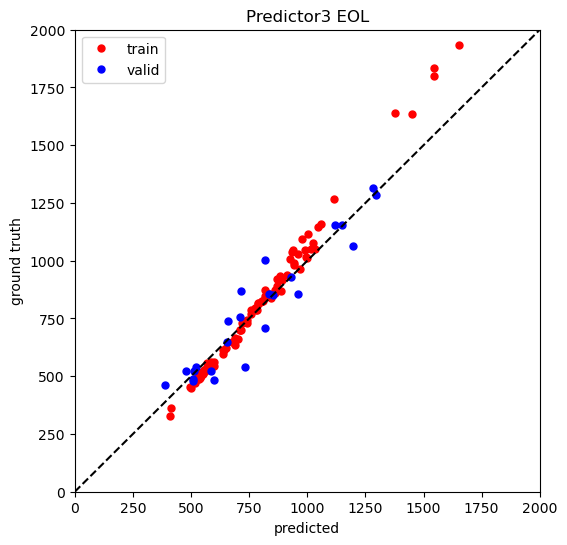

First 85 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 85 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 85 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.58, MAPE: 0.06
Testing set|RMSE: 85.20, MAPE: 0.09


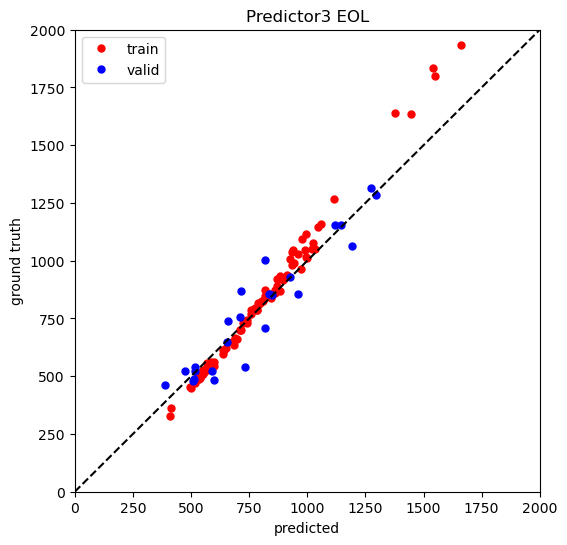

First 86 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 86 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 86 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.28, MAPE: 0.06
Testing set|RMSE: 85.29, MAPE: 0.09


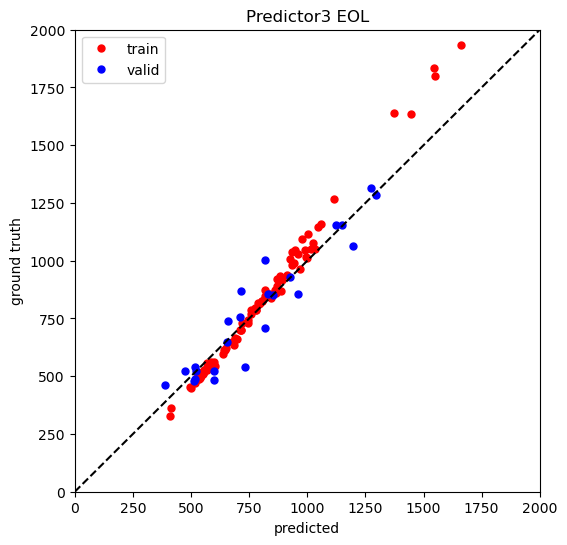

First 87 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 87 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 87 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.82, MAPE: 0.06
Testing set|RMSE: 84.87, MAPE: 0.09


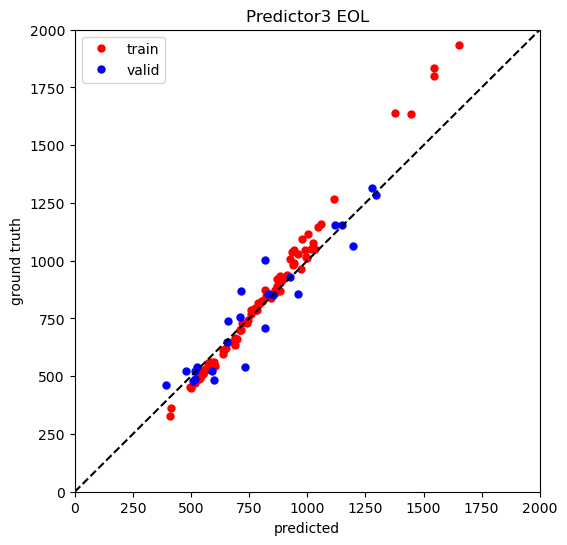

First 88 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 88 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 88 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.72, MAPE: 0.06
Testing set|RMSE: 85.24, MAPE: 0.09


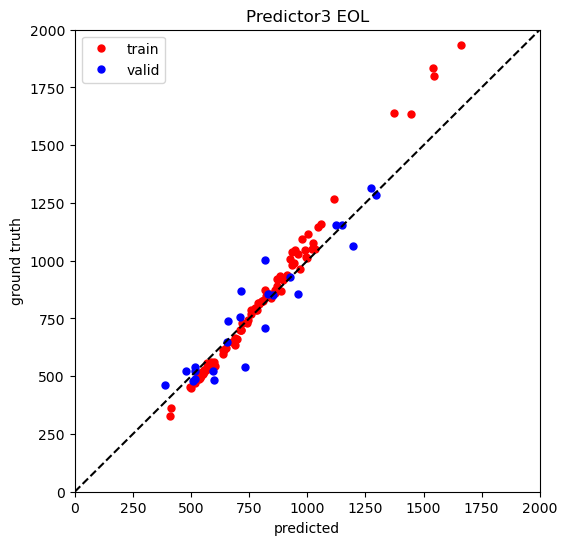

First 89 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 89 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 89 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.99, MAPE: 0.06
Testing set|RMSE: 84.70, MAPE: 0.09


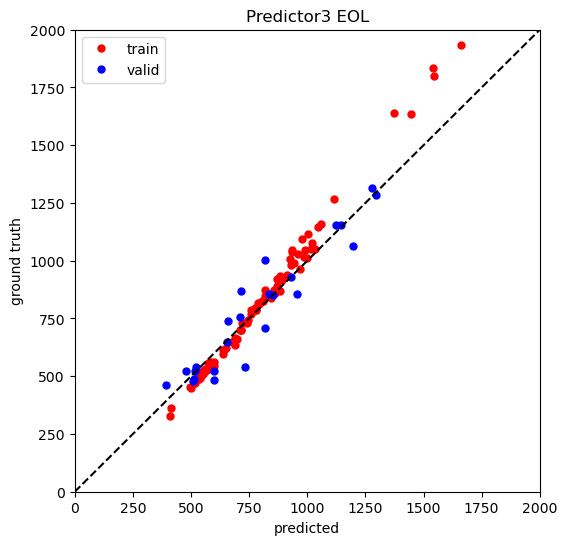

First 90 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 90 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 90 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.03, MAPE: 0.06
Testing set|RMSE: 84.60, MAPE: 0.09


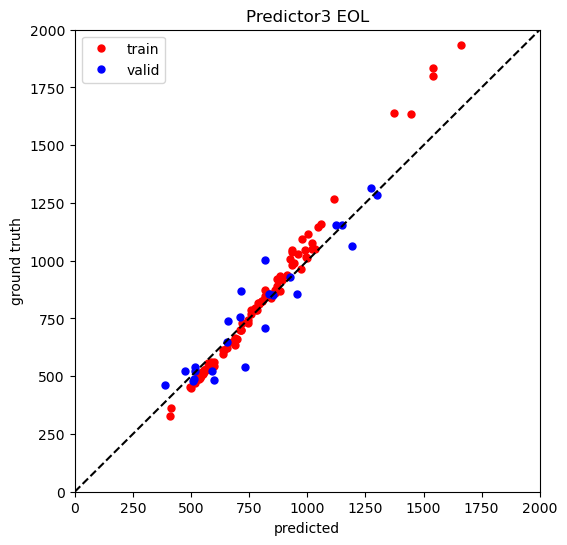

First 91 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 91 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 91 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 75.94, MAPE: 0.06
Testing set|RMSE: 85.04, MAPE: 0.09


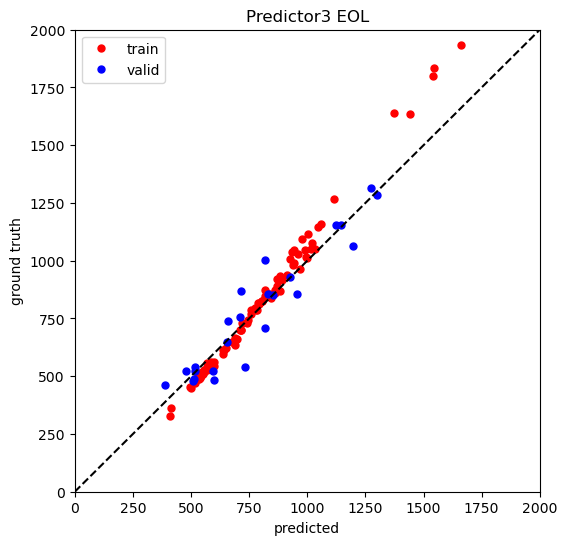

First 92 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 92 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 92 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.34, MAPE: 0.06
Testing set|RMSE: 84.94, MAPE: 0.09


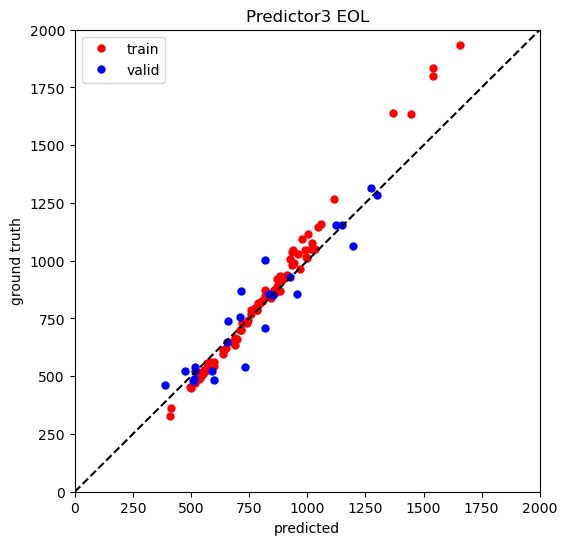

First 93 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 93 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 93 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.13, MAPE: 0.06
Testing set|RMSE: 84.82, MAPE: 0.09


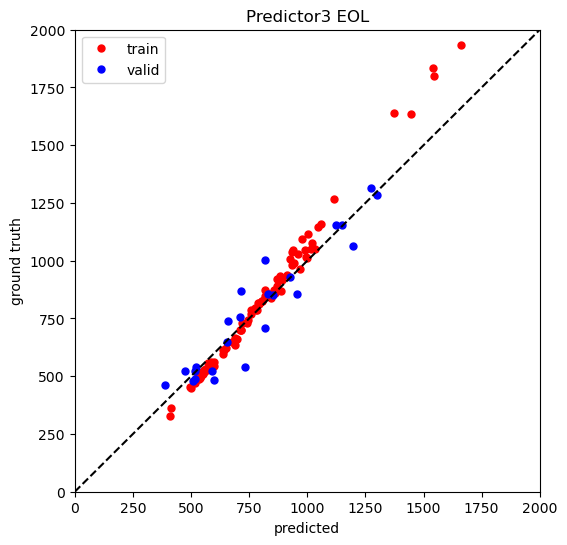

First 94 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 94 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 94 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.33, MAPE: 0.06
Testing set|RMSE: 84.91, MAPE: 0.09


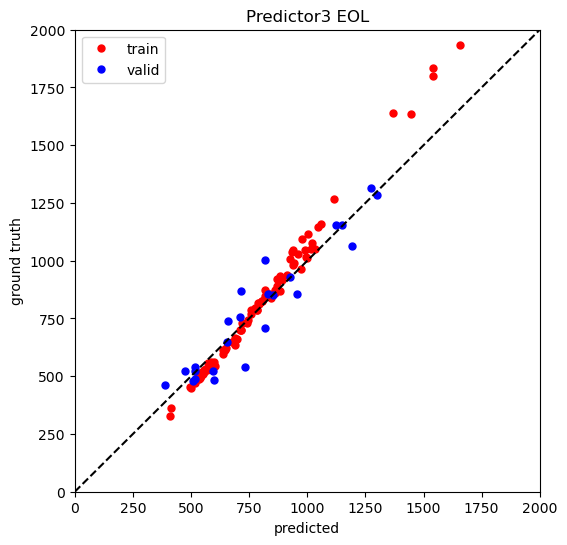

First 95 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 95 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 95 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.31, MAPE: 0.06
Testing set|RMSE: 84.86, MAPE: 0.09


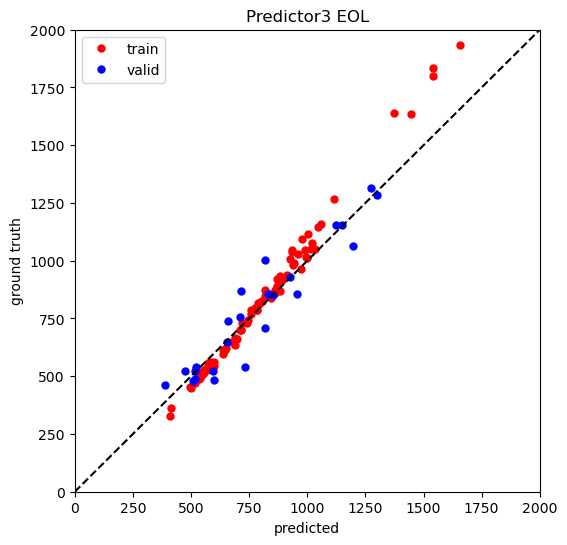

First 96 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 96 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 96 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.37, MAPE: 0.06
Testing set|RMSE: 84.93, MAPE: 0.09


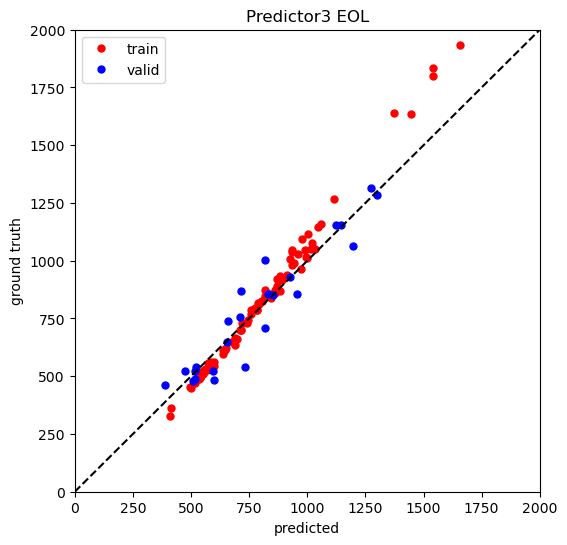

First 97 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 97 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 97 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.31, MAPE: 0.06
Testing set|RMSE: 84.90, MAPE: 0.09


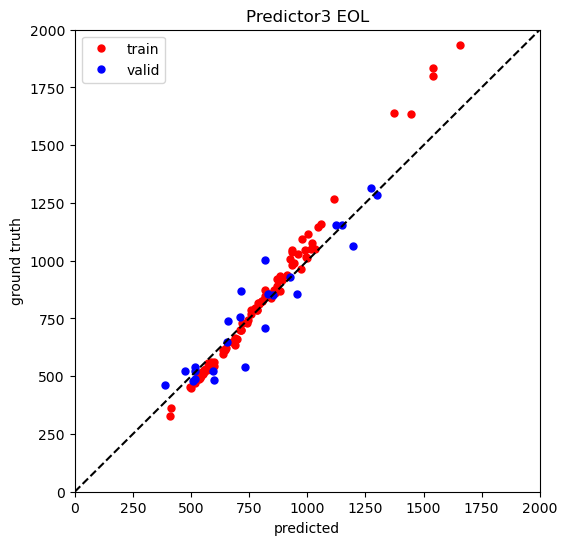

First 98 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 98 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 98 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.32, MAPE: 0.06
Testing set|RMSE: 84.90, MAPE: 0.09


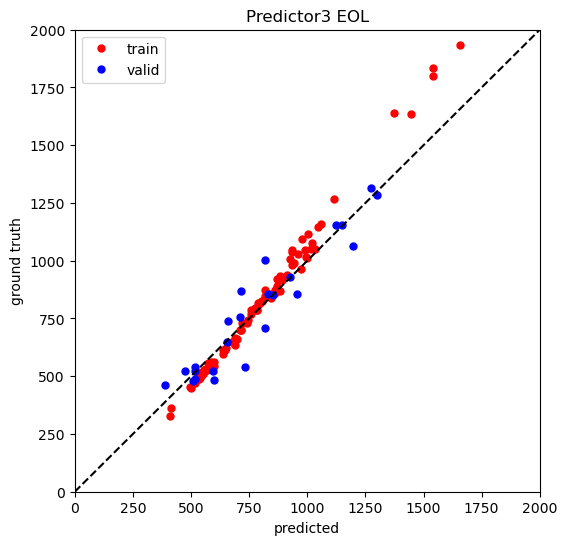

First 99 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 99 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 99 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.35, MAPE: 0.06
Testing set|RMSE: 84.89, MAPE: 0.09


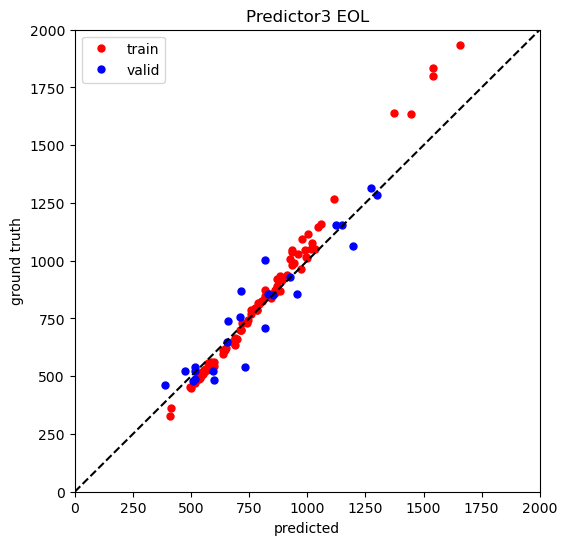

First 100 cycle data evaluation
+----------------------------------------------------------+
Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 76.34, MAPE: 0.06
Testing set|RMSE: 84.89, MAPE: 0.09


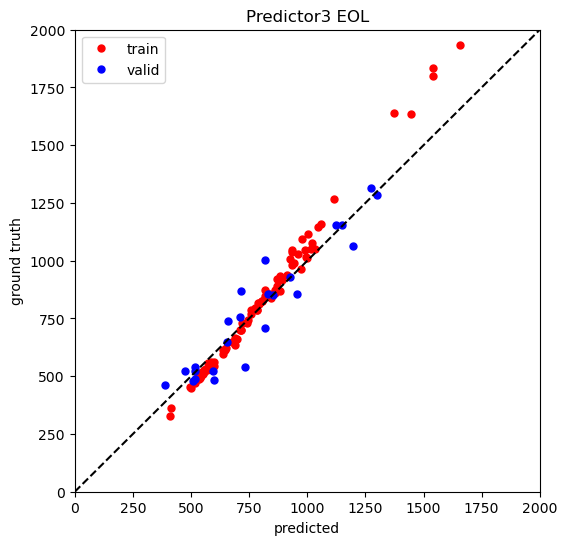

+----------------------------------------------------------+
All evaluation are done.


In [10]:
rmse_all = {'train_eol': [], 'test_eol': []}
predictor3_file = 'Full_model/predictor3_state102md3.pth'
set_code = 'state102'
file_tag = 'alltrial1'
for a in range(100):
    print(f'First {a+1} cycle data evaluation')
    print('+----------------------------------------------------------+')
    model = torch.load(predictor3_file)
    model.eval()
    _, test_eol_rmse = predictor3_eval(model, norm=True, cycle_used=a+1, train_batch_size=91, test_batch_size=24, file_tag=file_tag, set_code=set_code)
    rmse_all['test_eol'].append(test_eol_rmse)
print('+----------------------------------------------------------+')
print('All evaluation are done.')

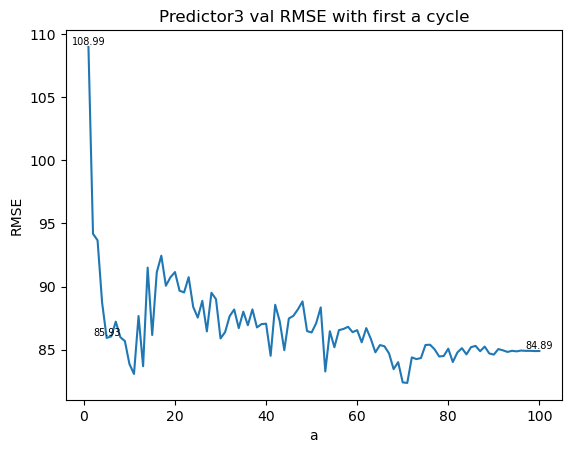

In [11]:
plt.figure()
plt.plot(np.arange(100)+1, rmse_all['test_eol'])
plt.title('Predictor3 val RMSE with first a cycle')
for a,b in zip(np.arange(100)+1, rmse_all['test_eol']):
    if a == 1 or a == 5 or a == 100:
        plt.text(a, b, '%.2f' % b, ha='center', va= 'bottom',fontsize=7)
plt.xlabel('a')
plt.ylabel('RMSE')
plt.show()

Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
Predictor1_dataset is in evaluation mode.
First 100 cycles are being used.
torch.Size([91, 10, 100])
Training set|RMSE: 61.41, MAPE: 0.04
Testing set|RMSE: 100.77, MAPE: 0.10


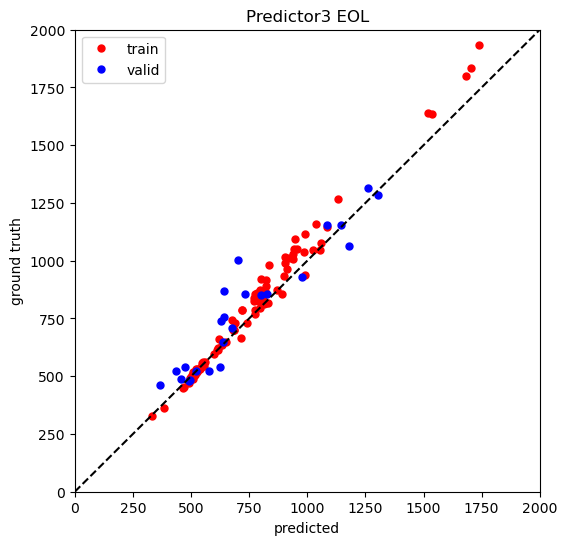

(61.40865707397461, 100.76663970947266)

In [7]:
predictor3_eval(torch.load('Full_model/predictor3_state102md2.pth'), cycle_used=100, train_batch_size=91, test_batch_size=24, set_code='state102', file_tag='')